In [1]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Suppressing Warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Reading input data file
reviews_raw = pd.read_csv('sample30.csv' , encoding='latin-1')
reviews_raw.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


### Lets understand the data and handle missing values if any

In [4]:
# Check shape of the dataframe
reviews_raw.shape

(30000, 15)

In [5]:
# Looking at the type of each column
reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
# Percentage of missing values
count=0
for column in reviews_raw:
    if reviews_raw[column].isna().sum()>0:
        print(column + " " + str(100*(reviews_raw[column].isna().sum())/(len(reviews_raw))))
        count=count+1
print("Count of Columns missing values :" + str(count))

manufacturer 0.47
reviews_date 0.15333333333333332
reviews_didPurchase 46.89333333333333
reviews_doRecommend 8.566666666666666
reviews_title 0.6333333333333333
reviews_userCity 93.57
reviews_userProvince 99.43333333333334
reviews_username 0.21
user_sentiment 0.0033333333333333335
Count of Columns missing values :9


In [7]:
# Dropping columns where misisng values is more than 90%
reviews_raw = reviews_raw.drop("reviews_userCity",axis=1)
reviews_raw = reviews_raw.drop("reviews_userProvince",axis=1)

In [8]:
# Dropping Order_id column that is insignificant
# reviews_raw = reviews_raw.drop("id",axis=1)

In [9]:
reviews_raw.shape

(30000, 13)

In [10]:
# Inspect rows where user_sentiments is null
reviews_raw[reviews_raw["user_sentiment"].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


In [11]:
# Imputing user_sentiment as positive on inspecting review_text, Review_Title and Reviews_ratings column values where user_sentiment is null
reviews_raw["user_sentiment"].fillna("Positive",inplace=True)

In [12]:
reviews_raw[reviews_raw["reviews_title"].isna()].head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
1239,AV1YneDPglJLPUi8IJyQ,Finish,"Household Essentials,Cleaning Supplies,Dish De...",Reckitt Benckiser,"Finish Quantum Dishwasher Detergent, Lemon Spa...",2017-11-16T08:12:30.000Z,NaN,True,5,Great quality and a great price,NaN,queen 79,Positive
1441,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2013-11-07T00:00:00Z,NaN,NaN,3,Wanted to love this but it's a bit too heavy f...,NaN,julie,Positive


In [13]:
# replace Nan values of reviews_title column with a space " "
reviews_raw["reviews_title"].fillna(" ",inplace=True)

In [14]:
# Contatente Reviews_Title and Reviews_Text column values
reviews_raw["Review_Comments"]=reviews_raw["reviews_title"].str.cat(reviews_raw["reviews_text"])

In [15]:
# Percentage of missing values
count=0
for column in reviews_raw:
    if reviews_raw[column].isna().sum()>0:
        print(column + " " + str(100*(reviews_raw[column].isna().sum())/(len(reviews_raw))))
        count=count+1
print("Count of Columns missing values :" + str(count))

manufacturer 0.47
reviews_date 0.15333333333333332
reviews_didPurchase 46.89333333333333
reviews_doRecommend 8.566666666666666
reviews_username 0.21
Count of Columns missing values :5


In [16]:
# Drop reviews_title and review_text columns 
reviews_raw = reviews_raw.drop(columns=["reviews_text","reviews_title"],axis=1)

In [17]:
reviews_raw.shape

(30000, 12)

In [18]:
# Impute the reviews_date column with mode value
reviews_raw["reviews_date"].fillna(reviews_raw["reviews_date"].mode()[0],inplace=True)

In [19]:
# Apply date datatype for column "reviews_date"
reviews_raw["reviews_date"] =  pd.to_datetime(reviews_raw["reviews_date"],errors='coerce', format='%Y-%m-%d')

In [20]:
# trim the time stamp from reviews_date columns
reviews_raw["reviews_date"]= reviews_raw["reviews_date"].dt.date

In [21]:
reviews_raw["reviews_date"][0:10]

0    2012-11-30
1    2017-07-09
2    2017-07-09
3    2016-01-06
4    2016-12-21
5    2016-04-20
6    2016-02-08
7    2016-02-21
8    2016-03-28
9    2016-03-21
Name: reviews_date, dtype: object

In [22]:
# Percentage of missing values
count=0
for column in reviews_raw:
    if reviews_raw[column].isna().sum()>0:
        print(column + " " + str(100*(reviews_raw[column].isna().sum())/(len(reviews_raw))))
        count=count+1
print("Count of Columns missing values :" + str(count))

manufacturer 0.47
reviews_date 0.02666666666666667
reviews_didPurchase 46.89333333333333
reviews_doRecommend 8.566666666666666
reviews_username 0.21
Count of Columns missing values :5


In [23]:
# inspect reviews_date for null values
reviews_raw[reviews_raw["reviews_date"].isna()].head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,Review_Comments
28421,AVpfSFDo1cnluZ0-hwjT,Concept Housewares,"Kitchen & Dining,Kitchen Storage & Organizatio...",Group5 Mktg/Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,NaT,False,True,3,hatestandinginlines,Positive,It matches what was already there.We moved int...
28422,AVpfSFDo1cnluZ0-hwjT,Concept Housewares,"Kitchen & Dining,Kitchen Storage & Organizatio...",Group5 Mktg/Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,NaT,False,True,5,karenh2008,Positive,"Great little rack, amazing priceJust bought on..."
28423,AVpfSFDo1cnluZ0-hwjT,Concept Housewares,"Kitchen & Dining,Kitchen Storage & Organizatio...",Group5 Mktg/Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,NaT,False,True,5,hellodanielle,Positive,Perfect for my Townhome!Living in a townhome d...
28424,AVpfSFDo1cnluZ0-hwjT,Concept Housewares,"Kitchen & Dining,Kitchen Storage & Organizatio...",Group5 Mktg/Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,NaT,True,True,5,laurel,Positive,Excellent PurchaseMy daughter-in-law purchased...
28425,AVpfSFDo1cnluZ0-hwjT,Concept Housewares,"Kitchen & Dining,Kitchen Storage & Organizatio...",Group5 Mktg/Concept Housewares,Concept Housewares 36 Natural Wood ceiling mou...,NaT,True,True,5,janet,Positive,great quality!Heavy duty - very durable-lookin...


In [24]:
# convert in str data type
reviews_raw["reviews_date"] =  reviews_raw["reviews_date"].astype(str)

In [25]:
# replace "NaT" values with Mode value for reviews_date column
reviews_raw["reviews_date"] =  reviews_raw["reviews_date"].apply(lambda x : reviews_raw["reviews_date"].mode() if x=="NaT" else x)

In [26]:
# Percentage of missing values
count=0
for column in reviews_raw:
    if reviews_raw[column].isna().sum()>0:
        print(column + " " + str(100*(reviews_raw[column].isna().sum())/(len(reviews_raw))))
        count=count+1
print("Count of Columns missing values :" + str(count))

manufacturer 0.47
reviews_didPurchase 46.89333333333333
reviews_doRecommend 8.566666666666666
reviews_username 0.21
Count of Columns missing values :4


In [27]:
reviews_raw["manufacturer"].value_counts()

Clorox                        8546
Test                          3325
AmazonUs/CLOO7                2039
L'oreal Paris                 1232
Walt Disney                   1143
                              ... 
CAL Lighting                     1
Scotty                           1
KeHE Distributors                1
Guardian Technologies, LLC       1
Teamson                          1
Name: manufacturer, Length: 227, dtype: int64

In [28]:
# Replace Null Manufacturer with value called "Dummy"
reviews_raw["manufacturer"].fillna("Dummy",inplace=True)

In [29]:
# Percentage of missing values
count=0
for column in reviews_raw:
    if reviews_raw[column].isna().sum()>0:
        print(column + " " + str(100*(reviews_raw[column].isna().sum())/(len(reviews_raw))))
        count=count+1
print("Count of Columns missing values :" + str(count))

reviews_didPurchase 46.89333333333333
reviews_doRecommend 8.566666666666666
reviews_username 0.21
Count of Columns missing values :3


In [30]:
# inspect reviews_username for null values
reviews_raw[reviews_raw["reviews_username"].isna()].head()

# These could be guest users, hence updating these user_names as "Guests_Users"

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,Review_Comments
1453,AVpe_N91LJeJML43z4jD,Way Basics,"Home,Kids' Home,Girls' Room,Girls' Room Furnit...",Way Basics,Way Basics 3-Shelf Eco Narrow Bookcase Storage...,2011-07-08,NaN,NaN,4,NaN,Positive,Way Basics 3-Shelf Storage Unit in Espresso Wo...
1531,AVpe_y-I1cnluZ0-bmvh,Yes to Carrots,"Personal Care,Bath, Shower & Soap,Body Wash & ...",Yes To Inc.,Yes To Carrots Nourishing Body Wash,2011-10-30,NaN,NaN,5,NaN,Positive,WonderfulI'm very sensitive to fragrance - mos...
1532,AVpe_y-I1cnluZ0-bmvh,Yes to Carrots,"Personal Care,Bath, Shower & Soap,Body Wash & ...",Yes To Inc.,Yes To Carrots Nourishing Body Wash,2013-07-19,NaN,NaN,5,NaN,Positive,Smell stays on your skinNot all shower gels le...
1787,AVpe38Uy1cnluZ0-YuJR,Target.com Use Only,"Movies, Music & Books,Movies,Music,All MGM Tit...",MGM (Video & DVD),Clambake (dvd),2012-01-26,NaN,NaN,2,NaN,Positive,Purely for Elvis fans...Not one of Elvis's bes...
1792,AVpe38Uy1cnluZ0-YuJR,Target.com Use Only,"Movies, Music & Books,Movies,Music,All MGM Tit...",MGM (Video & DVD),Clambake (dvd),2012-01-26,NaN,NaN,4,NaN,Positive,"If you like EP, you'll love this oneLike every..."


In [31]:
# Replace Null user_names with value called "Guests_Users"
reviews_raw["reviews_username"].fillna("Guests_Users",inplace=True)

In [32]:
# Percentage of missing values
count=0
for column in reviews_raw:
    if reviews_raw[column].isna().sum()>0:
        print(column + " " + str(100*(reviews_raw[column].isna().sum())/(len(reviews_raw))))
        count=count+1
print("Count of Columns missing values :" + str(count))

reviews_didPurchase 46.89333333333333
reviews_doRecommend 8.566666666666666
Count of Columns missing values :2


In [33]:
# inspect reviews_didPurchase for null values
reviews_raw[reviews_raw["reviews_didPurchase"].isna()].head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,Review_Comments
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30,NaN,NaN,5,joshua,Positive,Just Awesomei love this album. it's very good....
30,AV1d76w7vKc47QAVhCqn,J.R. Watkins,"Personal Care,Skin Care,Hand Cream,Beauty,Body...",J.R. Watkins,"J.R. Watkins Hand Cream, Lemon Cream",2011-01-30,NaN,NaN,5,peach pie,Positive,"Yummilicious And...yes, the scent is the best...."
37,AV1h6gSl-jtxr-f31p40,AMBI,"Personal Care,Bath, Shower & Soap,Featured Bra...",FLEMING & CO,Ambi Complexion Cleansing Bar,2016-02-28,NaN,True,5,shedove,Positive,Still WorksMakes my skin feel clean and not su...
43,AV1h6Gu0glJLPUi8IjA_,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",Johnson's,"Johnson's Baby Bubble Bath and Wash, 15oz",2017-05-09,NaN,True,4,solo,Positive,"2 In 1!!!Well, Johnson's need I say more I kno..."
67,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2016-04-30,NaN,True,3,mylifeinheels,Positive,Why No Fragrance-Free FormulaToday is my first...


In [34]:
reviews_raw["reviews_didPurchase"].mode()

0    False
dtype: object

In [35]:
# Impute the reviews_didPurchase column with mode value
reviews_raw["reviews_didPurchase"].fillna(reviews_raw["reviews_didPurchase"].mode()[0],inplace=True)

In [36]:
reviews_raw["reviews_doRecommend"].value_counts()

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

In [37]:
# Impute the reviews_doRecommend column with mode value
reviews_raw["reviews_doRecommend"].fillna(reviews_raw["reviews_doRecommend"].mode()[0],inplace=True)

In [38]:
# Percentage of missing values
count=0
for column in reviews_raw:
    if reviews_raw[column].isna().sum()>0:
        print(column + " " + str(100*(reviews_raw[column].isna().sum())/(len(reviews_raw))))
        count=count+1
print("Count of Columns missing values :" + str(count))

Count of Columns missing values :0


In [39]:
# Add user_id column to identify users

reviews_raw = reviews_raw.assign(user_id=(reviews_raw['reviews_username']).astype('category').cat.codes)

In [40]:
reviews_raw.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,Review_Comments,user_id
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30,False,True,5,joshua,Positive,Just Awesomei love this album. it's very good....,11441
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,True,True,5,dorothy w,Positive,GoodGood flavor. This review was collected as ...,6975
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,True,True,5,dorothy w,Positive,GoodGood flavor.,6975
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06,False,False,1,rebecca,Negative,DisappointedI read through the reviews on here...,19328
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21,False,False,1,walker557,Negative,IrritationMy husband bought this gel for us. T...,24206


#### *** Data clean up is done and there are no missing values now ***

## Perform EDA

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
dfdistint = reviews_raw.name.unique()
print(reviews_raw.columns)
print(reviews_raw.shape)
print(dfdistint.shape)

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_username', 'user_sentiment', 'Review_Comments', 'user_id'],
      dtype='object')
(30000, 13)
(271,)


#### ****** There are 271 Distinct products ******

In [43]:
reviews_raw['name'].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                               8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                         3325
Clorox Disinfecting Bathroom Cleaner                                                                    2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                          1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                                     1143
                                                                                                        ... 
JNH Lifestyles Goldstar 3 Person FAR Infrared Sauna                                                        1
Every Man Jack Pomade Signature Mint Scent                                                                 1
Iman Luxury Moisturizing Lipstick, Black Brandy 006                                                        1
Carson-Dellosa Publ

In [44]:
# Replace categorical variables with Binary / numeric values
reviews_raw["reviews_didPurchase"].value_counts()

False    28566
True      1434
Name: reviews_didPurchase, dtype: int64

In [45]:
reviews_raw["reviews_didPurchase"] =  reviews_raw["reviews_didPurchase"].apply(lambda x : 1 if x==True else 0)

In [46]:
reviews_raw["reviews_doRecommend"].value_counts()

True     28450
False     1550
Name: reviews_doRecommend, dtype: int64

In [47]:
reviews_raw["reviews_doRecommend"] =  reviews_raw["reviews_doRecommend"].apply(lambda x : 1 if x==True else 0)

In [48]:
reviews_raw["user_sentiment"].value_counts()

Positive    26633
Negative     3367
Name: user_sentiment, dtype: int64

In [49]:
reviews_raw["user_sentiment"] =  reviews_raw["user_sentiment"].apply(lambda x : 1 if x=="Positive" else 0)

In [50]:
reviews_raw.describe()

,reviews_didPurchase,reviews_doRecommend,reviews_rating,user_sentiment,user_id
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.047800,0.948333,4.483133,0.887767,12452.822667
std,0.213346,0.221357,0.988441,0.315659,7168.849479
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,1.000000,6246.750000
50%,0.000000,1.000000,5.000000,1.000000,12460.500000
75%,0.000000,1.000000,5.000000,1.000000,18625.250000
max,1.000000,1.000000,5.000000,1.000000,24914.000000


In [51]:
#Univariate Numerical
f=['reviews_didPurchase', 'reviews_doRecommend','reviews_rating','user_sentiment']

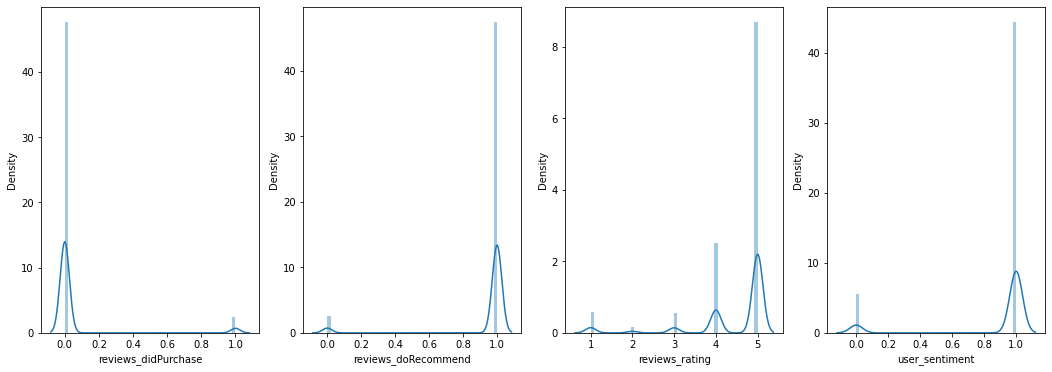

In [52]:
# Univariate Analysis

plt.figure(figsize = (18,6))
#f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(1,4,i[0]+1)
    sns.distplot(reviews_raw[i[1]])
plt.show()    

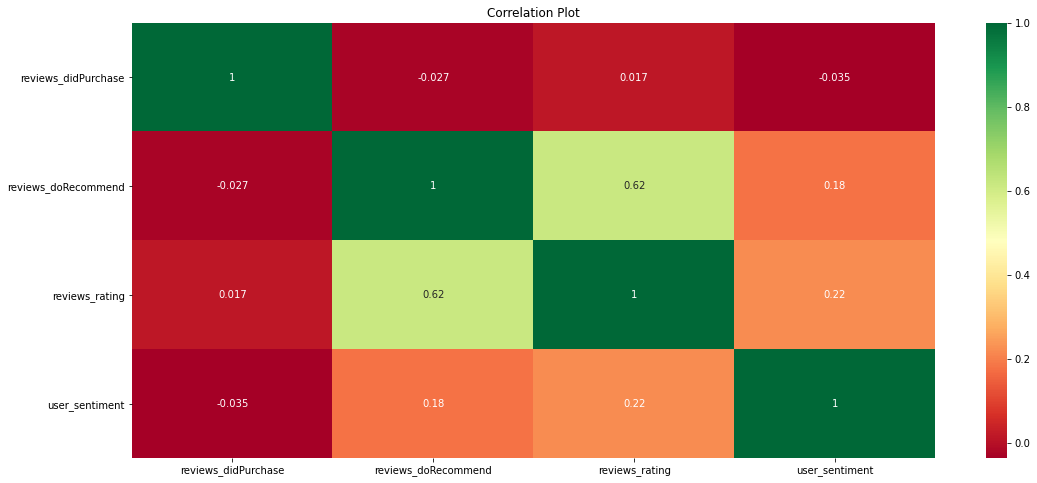

In [53]:
#Correlation plot
df_corr=reviews_raw[['reviews_didPurchase', 'reviews_doRecommend','reviews_rating','user_sentiment']]
corr=df_corr.corr()

plt.figure(figsize = (18,8))
plt.title('Correlation Plot')
sns.heatmap(corr, cmap='RdYlGn',annot=True)
plt.show()

#### There seems to be reasonable coorelation between reviews_rating and reviews_doRecommend variables at 0.62

### +++  Prepare data for sentiment analysis  +++

In [54]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import datetime

from spellchecker import SpellChecker

spell = SpellChecker() # Initiate spell checker object
# porter = PorterStemmer() # Initiate porter stemmer object
wordnet_lemmatizer = WordNetLemmatizer() # Initiate wordnet lemmatizer object

In [55]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [56]:

# lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]

In [57]:
#import nltk stopwords
stopwords = stopwords.words('english')

#change all stopwords into lowercase
stopwords_lower = [s.lower() for s in stopwords]

In [58]:
def text_preprocessing(str_input): 
     
    # tokenise text
    tokens = word_tokenize(str_input)
    
    #Spell Correction
#     words =[spell.correction(token) for token in tokens]
    
    #tokenization, remove punctuation, lemmatization
    words =[wordnet_lemmatizer.lemmatize(token) for token in tokens]
    
 
    # remove symbols, websites, email addresses 
    words = [re.sub(r"[^A-Za-z@]", "", word) for word in words] 
    words = [re.sub(r"\S+com", "", word) for word in words]
    words = [re.sub(r"\S+@\S+", "", word) for word in words] 
    words = [word for word in words if word!=' ']
    words = [word for word in words if len(word)!=0] 
 
    #remove stopwords     
    words=[word.lower() for word in words if word.lower() not in stopwords_lower]
    
  
    #combine a list into one string   
    string = " ".join(words)
    
    return string

In [59]:
start_time = timer(None) # timing starts from this point for "start_time" variable

reviews_raw['Review_Comments_Cleaned']=reviews_raw['Review_Comments'].apply(text_preprocessing)

timer(start_time) # timing ends here for "start_time" variable

# takes about 3 hours with spell check


 Time taken: 0 hours 0 minutes and 54.79 seconds.


In [60]:
reviews_raw.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,Review_Comments,user_id,Review_Comments_Cleaned
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30,0,1,5,joshua,1,Just Awesomei love this album. it's very good....,11441,awesomei love album good hip hop side current ...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,1,1,5,dorothy w,1,GoodGood flavor. This review was collected as ...,6975,goodgood flavor review wa collected part promo...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,1,1,5,dorothy w,1,GoodGood flavor.,6975,goodgood flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06,0,0,1,rebecca,0,DisappointedI read through the reviews on here...,19328,disappointedi read review looking buying one c...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21,0,0,1,walker557,0,IrritationMy husband bought this gel for us. T...,24206,irritationmy husband bought gel u gel caused i...


In [61]:
# Add product_id column to identify unique products

reviews_raw = reviews_raw.assign(product_id=(reviews_raw['name']).astype('category').cat.codes)


In [62]:
reviews_raw.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,Review_Comments,user_id,Review_Comments_Cleaned,product_id
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30,0,1,5,joshua,1,Just Awesomei love this album. it's very good....,11441,awesomei love album good hip hop side current ...,182
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,1,1,5,dorothy w,1,GoodGood flavor. This review was collected as ...,6975,goodgood flavor review wa collected part promo...,140
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,1,1,5,dorothy w,1,GoodGood flavor.,6975,goodgood flavor,140
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06,0,0,1,rebecca,0,DisappointedI read through the reviews on here...,19328,disappointedi read review looking buying one c...,120
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21,0,0,1,walker557,0,IrritationMy husband bought this gel for us. T...,24206,irritationmy husband bought gel u gel caused i...,120


In [63]:
# Take dump of reviews_raw dataframe with clean data
pickle.dump(reviews_raw , open("reviews_raw.pkl",'wb'))

In [64]:
reviews_raw.to_csv('reviews_raw.csv',header = True)

### +++ Text Cleaning is complete +++ 

#### +++ Feature Extraction +++

In [65]:
# Create new dataframe with only select columns of interest
reviews_raw_subset = reviews_raw[["product_id","user_id","reviews_rating","user_sentiment","Review_Comments_Cleaned"]]

In [66]:
pickle.dump(reviews_raw_subset , open("reviews_raw_subset.pkl",'wb'))

In [67]:
reviews_raw_subset.head()

,product_id,user_id,reviews_rating,user_sentiment,Review_Comments_Cleaned
0,182,11441,5,1,awesomei love album good hip hop side current ...
1,140,6975,5,1,goodgood flavor review wa collected part promo...
2,140,6975,5,1,goodgood flavor
3,120,19328,1,0,disappointedi read review looking buying one c...
4,120,24206,1,0,irritationmy husband bought gel u gel caused i...


In [68]:
reviews_raw_subset["user_sentiment"].value_counts()

1    26633
0     3367
Name: user_sentiment, dtype: int64

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfconverter = TfidfVectorizer(max_features = 300,min_df=5, max_df=0.7, stop_words='english')


In [70]:
reviews_raw_tfidf = tfidfconverter.fit_transform(reviews_raw_subset["Review_Comments_Cleaned"])


In [71]:
pickle.dump(tfidfconverter , open("tfidfconverter.pkl",'wb'))

In [72]:
# Let's look at the dataframe
reviews_tfidf = pd.DataFrame(reviews_raw_tfidf.toarray(), columns = tfidfconverter.get_feature_names())
reviews_tfidf

,able,absolutely,action,actually,add,amazing,area,away,awesome,baby,...,wipe,wipes,wipesi,wish,wonderful,work,worked,works,worth,year
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.251257,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
reviews_tfidf.shape

(30000, 300)

In [74]:
reviews_cleaned = reviews_raw_subset["Review_Comments_Cleaned"]

In [75]:
reviews_cleaned

0        awesomei love album good hip hop side current ...
1        goodgood flavor review wa collected part promo...
2                                          goodgood flavor
3        disappointedi read review looking buying one c...
4        irritationmy husband bought gel u gel caused i...
                               ...                        
29995    softness got conditioner influenster try im lo...
29996    love iti love received review purpose influens...
29997    hair smooth usefirst love smell product wash h...
29998    perfect oily hair received influenster never g...
29999    conditioned healthyi received product complime...
Name: Review_Comments_Cleaned, Length: 30000, dtype: object

In [76]:
reviews_cleaned = pd.DataFrame(reviews_cleaned)

In [77]:
reviews_cleaned.columns

Index(['Review_Comments_Cleaned'], dtype='object')

In [78]:
reviews_cleaned_tf_idf= tfidfconverter.fit_transform(reviews_cleaned["Review_Comments_Cleaned"])

In [79]:
X = reviews_cleaned_tf_idf.toarray()

In [80]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
X.shape

(30000, 300)

In [82]:
y=reviews_raw_subset.iloc[:,3].values
y


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [83]:
y.shape

(30000,)

In [84]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 300)
(6000, 300)
(24000,)
(6000,)


In [86]:
# Check if imbalance class
(unique, counts) = np.unique(y_train, return_counts=True)

In [87]:
sentiment_frequencies = np.asarray((unique, counts)).T
sentiment_frequencies

array([[    0,  2742],
       [    1, 21258]], dtype=int64)

In [88]:
# Implement balancing techniques to addresss class imbalance using SMOTE

from imblearn.over_sampling import SMOTE
# counter = Counter(y_train)
# print('Before',counter)

smt = SMOTE()
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

# counter = Counter(y_train_smote)
# print('After',counter)

In [89]:
(unique, counts) = np.unique(y_train_smote, return_counts=True)
sentiment_frequencies = np.asarray((unique, counts)).T
sentiment_frequencies

array([[    0, 21258],
       [    1, 21258]], dtype=int64)

#### +++ Target variable is balanced now +++

In [90]:
# Implement balancing techniques to addresss class imbalance using Oversampling

from imblearn.over_sampling import RandomOverSampler
# counter = Counter(y_train)
# print('Before',counter)

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# counter = Counter(y_train_smote)
# print('After',counter)

In [91]:
(unique, counts) = np.unique(y_train_ros, return_counts=True)
sentiment_frequencies = np.asarray((unique, counts)).T
sentiment_frequencies

array([[    0, 21258],
       [    1, 21258]], dtype=int64)

### +++ Modelling - Naive Bayes Classifier +++

In [92]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train) # No Balancing

GaussianNB()

In [93]:
y_pred = classifier.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [95]:
# Since Balancing was required for target variable, we shall look at Sensitivity, specficity and Accurany metrix to evaluate models
Compare_Model_Metrics=[]
Compare_Model_Metrics = pd.DataFrame(columns=["Model","Sensitivity","Specificity","Accuracy"])

In [96]:
Accuracy_NB=accuracy_score(y_test,y_pred)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.21      0.77      0.33       625
           1       0.96      0.67      0.79      5375

    accuracy                           0.68      6000
   macro avg       0.59      0.72      0.56      6000
weighted avg       0.88      0.68      0.74      6000



In [98]:
cf_naive_bayes=confusion_matrix(y_test,y_pred)

In [99]:
TP = cf_naive_bayes[1,1] # true positive 
TN = cf_naive_bayes[0,0] # true negatives
FP = cf_naive_bayes[0,1] # false positives
FN = cf_naive_bayes[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our Naive Bayes model
Sensitivity_NB=TP / float(TP+FN)
Sensitivity_NB

0.6654883720930233

In [101]:
# Let us calculate specificity of our Naive Bayes model
Specificity_NB=TN / float(TN+FP)
Specificity_NB

0.7696

In [102]:
Naive_Bayes_NoBalancing = {'Model':'Naive_Bayes_NoBalancing', 'Sensitivity':Sensitivity_NB, 'Specificity':Specificity_NB, 'Accuracy':Accuracy_NB}

In [103]:
Compare_Model_Metrics = Compare_Model_Metrics.append(Naive_Bayes_NoBalancing, ignore_index=True)

In [104]:
Compare_Model_Metrics

,Model,Sensitivity,Specificity,Accuracy
0,Naive_Bayes_NoBalancing,0.665488,0.7696,0.676333


In [105]:
# Naive Bayes on balanced dataset (SMOTE)

classifier_sm = GaussianNB()
classifier_sm.fit(X_train_smote, y_train_smote) # Balanced data using SMOTE

GaussianNB()

In [106]:
y_pred_sm = classifier_sm.predict(X_test)

In [107]:
Accuracy_NB_SM=accuracy_score(y_test,y_pred_sm)
Accuracy_NB_SM

0.673

In [108]:
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.19      0.67      0.30       625
           1       0.95      0.67      0.79      5375

    accuracy                           0.67      6000
   macro avg       0.57      0.67      0.54      6000
weighted avg       0.87      0.67      0.74      6000



In [109]:
cf_naive_bayes_sm=confusion_matrix(y_test,y_pred_sm)

In [110]:
TP = cf_naive_bayes_sm[1,1] # true positive 
TN = cf_naive_bayes_sm[0,0] # true negatives
FP = cf_naive_bayes_sm[0,1] # false positives
FN = cf_naive_bayes_sm[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our Naive Bayes model
Sensitivity_NB_SM=TP / float(TP+FN)
Sensitivity_NB_SM

0.6729302325581396

In [112]:
# Let us calculate specificity of our Naive Bayes model
Specificity_NB_SM=TN / float(TN+FP)
Specificity_NB_SM

0.6736

In [113]:
Naive_Bayes_SM = {'Model':'Naive_Bayes_SM', 'Sensitivity':Sensitivity_NB_SM, 'Specificity':Specificity_NB_SM, 'Accuracy':Accuracy_NB_SM}

In [114]:
Compare_Model_Metrics = Compare_Model_Metrics.append(Naive_Bayes_SM, ignore_index=True)

In [115]:
Compare_Model_Metrics

,Model,Sensitivity,Specificity,Accuracy
0,Naive_Bayes_NoBalancing,0.665488,0.7696,0.676333
1,Naive_Bayes_SM,0.672930,0.6736,0.673000


In [116]:
# Naive Bayes on balanced dataset (Random Over Sampling)

classifier_ros = GaussianNB()
classifier_ros.fit(X_train_ros, y_train_ros) # Balanced data using Random Over Sampling

GaussianNB()

In [117]:
y_pred_ros = classifier_ros.predict(X_test)

In [118]:
Accuracy_NB_ROS=accuracy_score(y_test,y_pred_ros)
Accuracy_NB_ROS

0.6656666666666666

In [119]:
print(classification_report(y_test,y_pred_ros))

              precision    recall  f1-score   support

           0       0.21      0.78      0.33       625
           1       0.96      0.65      0.78      5375

    accuracy                           0.67      6000
   macro avg       0.58      0.72      0.55      6000
weighted avg       0.88      0.67      0.73      6000



In [120]:
cf_naive_bayes_ros=confusion_matrix(y_test,y_pred_ros)

In [121]:
TP = cf_naive_bayes_ros[1,1] # true positive 
TN = cf_naive_bayes_ros[0,0] # true negatives
FP = cf_naive_bayes_ros[0,1] # false positives
FN = cf_naive_bayes_ros[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our Naive Bayes model
Sensitivity_NB_ROS=TP / float(TP+FN)
Sensitivity_NB_ROS

0.6524651162790698

In [123]:
# Let us calculate specificity of our Naive Bayes model
Specificity_NB_ROS=TN / float(TN+FP)
Specificity_NB_ROS

0.7792

In [124]:
Naive_Bayes_ROS = {'Model':'Naive_Bayes_ROS', 'Sensitivity':Sensitivity_NB_ROS, 'Specificity':Specificity_NB_ROS, 'Accuracy':Accuracy_NB_ROS}

In [125]:
Compare_Model_Metrics = Compare_Model_Metrics.append(Naive_Bayes_ROS, ignore_index=True)

In [126]:
Compare_Model_Metrics

,Model,Sensitivity,Specificity,Accuracy
0,Naive_Bayes_NoBalancing,0.665488,0.7696,0.676333
1,Naive_Bayes_SM,0.672930,0.6736,0.673000
2,Naive_Bayes_ROS,0.652465,0.7792,0.665667


### +++ Modelling - Logistic Regression +++

In [127]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data (No Balancing)
logreg.fit(X_train,y_train)

#
y_pred_lr=logreg.predict(X_test)

In [128]:
Accuracy_LR=accuracy_score(y_test,y_pred_lr)
Accuracy_LR

0.9036666666666666

In [129]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.64      0.17      0.27       625
           1       0.91      0.99      0.95      5375

    accuracy                           0.90      6000
   macro avg       0.78      0.58      0.61      6000
weighted avg       0.88      0.90      0.88      6000



In [130]:
cf_lr=confusion_matrix(y_test,y_pred_lr)
cf_lr

array([[ 106,  519],
       [  59, 5316]], dtype=int64)

In [131]:
TP = cf_lr[1,1] # true positive 
TN = cf_lr[0,0] # true negatives
FP = cf_lr[0,1] # false positives
FN = cf_lr[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our LR model
Sensitivity_LR=TP / float(TP+FN)
Sensitivity_LR

0.9890232558139535

In [133]:
# Let us calculate specificity of our LR model
Specificity_LR=TN / float(TN+FP)
Specificity_LR

0.1696

In [134]:
LR = {'Model':'LR', 'Sensitivity':Sensitivity_LR, 'Specificity':Specificity_LR, 'Accuracy':Accuracy_LR}

In [135]:
Compare_Model_Metrics = Compare_Model_Metrics.append(LR, ignore_index=True)

In [136]:
Compare_Model_Metrics

,Model,Sensitivity,Specificity,Accuracy
0,Naive_Bayes_NoBalancing,0.665488,0.7696,0.676333
1,Naive_Bayes_SM,0.672930,0.6736,0.673000
2,Naive_Bayes_ROS,0.652465,0.7792,0.665667
3,LR,0.989023,0.1696,0.903667


In [137]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg_sm = LogisticRegression()

# fit the model with data (Balanced using SMOTE)
logreg_sm.fit(X_train_smote,y_train_smote)

#
y_pred_lr_sm=logreg_sm.predict(X_test)

In [138]:
Accuracy_LR_SM=accuracy_score(y_test,y_pred_lr_sm)
Accuracy_LR_SM

0.812

In [139]:
print(classification_report(y_test,y_pred_lr_sm))

              precision    recall  f1-score   support

           0       0.32      0.71      0.44       625
           1       0.96      0.82      0.89      5375

    accuracy                           0.81      6000
   macro avg       0.64      0.77      0.66      6000
weighted avg       0.89      0.81      0.84      6000



In [140]:
cf_lr_sm=confusion_matrix(y_test,y_pred_lr_sm)
cf_lr_sm

array([[ 442,  183],
       [ 945, 4430]], dtype=int64)

In [141]:
TP = cf_lr_sm[1,1] # true positive 
TN = cf_lr_sm[0,0] # true negatives
FP = cf_lr_sm[0,1] # false positives
FN = cf_lr_sm[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our LR model
Sensitivity_LR_SM=TP / float(TP+FN)
Sensitivity_LR_SM

0.8241860465116279

In [143]:
# Let us calculate specificity of our LR model
Specificity_LR_SM=TN / float(TN+FP)
Specificity_LR_SM

0.7072

In [144]:
LR_SM = {'Model':'LR_SM', 'Sensitivity':Sensitivity_LR_SM, 'Specificity':Specificity_LR_SM, 'Accuracy':Accuracy_LR_SM}

In [145]:
Compare_Model_Metrics = Compare_Model_Metrics.append(LR_SM, ignore_index=True)

In [146]:
Compare_Model_Metrics

,Model,Sensitivity,Specificity,Accuracy
0,Naive_Bayes_NoBalancing,0.665488,0.7696,0.676333
1,Naive_Bayes_SM,0.672930,0.6736,0.673000
2,Naive_Bayes_ROS,0.652465,0.7792,0.665667
3,LR,0.989023,0.1696,0.903667
4,LR_SM,0.824186,0.7072,0.812000


In [147]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg_ros = LogisticRegression()

# fit the model with data (Balanced using Random Over Sampling)
logreg_ros.fit(X_train_ros,y_train_ros)

#
y_pred_lr_ros=logreg_ros.predict(X_test)

In [148]:
Accuracy_LR_ROS=accuracy_score(y_test,y_pred_lr_ros)
Accuracy_LR_ROS

0.7881666666666667

In [149]:
print(classification_report(y_test,y_pred_lr_ros))

              precision    recall  f1-score   support

           0       0.30      0.77      0.43       625
           1       0.97      0.79      0.87      5375

    accuracy                           0.79      6000
   macro avg       0.63      0.78      0.65      6000
weighted avg       0.90      0.79      0.82      6000



In [150]:
cf_lr_ros=confusion_matrix(y_test,y_pred_lr_ros)
cf_lr_ros

array([[ 484,  141],
       [1130, 4245]], dtype=int64)

In [151]:
TP = cf_lr_ros[1,1] # true positive 
TN = cf_lr_ros[0,0] # true negatives
FP = cf_lr_ros[0,1] # false positives
FN = cf_lr_ros[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our LR model
Sensitivity_LR_ROS=TP / float(TP+FN)
Sensitivity_LR_ROS

0.7897674418604651

In [153]:
# Let us calculate specificity of our LR model
Specificity_LR_ROS=TN / float(TN+FP)
Specificity_LR_ROS

0.7744

In [154]:
LR_ROS = {'Model':'LR_ROS', 'Sensitivity':Sensitivity_LR_ROS, 'Specificity':Specificity_LR_ROS, 'Accuracy':Accuracy_LR_ROS}

In [155]:
Compare_Model_Metrics = Compare_Model_Metrics.append(LR_ROS, ignore_index=True)

In [156]:
Compare_Model_Metrics

,Model,Sensitivity,Specificity,Accuracy
0,Naive_Bayes_NoBalancing,0.665488,0.7696,0.676333
1,Naive_Bayes_SM,0.672930,0.6736,0.673000
2,Naive_Bayes_ROS,0.652465,0.7792,0.665667
3,LR,0.989023,0.1696,0.903667
4,LR_SM,0.824186,0.7072,0.812000
5,LR_ROS,0.789767,0.7744,0.788167


### +++ XGBoost Model +++

In [157]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred_xgb=xgb.predict(X_test)

[01:16:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [158]:
Accuracy_XGB=accuracy_score(y_test,y_pred_xgb)
Accuracy_XGB

0.9051666666666667

In [159]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.63      0.22      0.33       625
           1       0.92      0.98      0.95      5375

    accuracy                           0.91      6000
   macro avg       0.77      0.60      0.64      6000
weighted avg       0.89      0.91      0.88      6000



In [160]:
cf_xgb=confusion_matrix(y_test,y_pred_xgb)
cf_xgb

array([[ 139,  486],
       [  83, 5292]], dtype=int64)

In [161]:
TP = cf_xgb[1,1] # true positive 
TN = cf_xgb[0,0] # true negatives
FP = cf_xgb[0,1] # false positives
FN = cf_xgb[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our LR model
Sensitivity_XGB=TP / float(TP+FN)
Sensitivity_XGB

0.9845581395348837

In [163]:
# Let us calculate specificity of our LR model
Specificity_XGB=TN / float(TN+FP)
Specificity_XGB

0.2224

In [164]:
XGB = {'Model':'XGBoost', 'Sensitivity':Sensitivity_XGB, 'Specificity':Specificity_XGB, 'Accuracy':Accuracy_XGB}

In [165]:
Compare_Model_Metrics = Compare_Model_Metrics.append(XGB, ignore_index=True)

In [166]:
Compare_Model_Metrics

,Model,Sensitivity,Specificity,Accuracy
0,Naive_Bayes_NoBalancing,0.665488,0.7696,0.676333
1,Naive_Bayes_SM,0.672930,0.6736,0.673000
2,Naive_Bayes_ROS,0.652465,0.7792,0.665667
3,LR,0.989023,0.1696,0.903667
4,LR_SM,0.824186,0.7072,0.812000
5,LR_ROS,0.789767,0.7744,0.788167
6,XGBoost,0.984558,0.2224,0.905167


In [167]:
# XGBoost using balanced data (SMOTE)

from xgboost import XGBClassifier
xgb_sm = XGBClassifier()
xgb_sm.fit(X_train_smote,y_train_smote)

y_pred_xgb_sm = xgb_sm.predict(X_test)

[01:16:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [168]:
Accuracy_XGB_SM=accuracy_score(y_test,y_pred_xgb_sm)
Accuracy_XGB_SM

0.8425

In [169]:
print(classification_report(y_test,y_pred_xgb_sm))

              precision    recall  f1-score   support

           0       0.36      0.64      0.46       625
           1       0.95      0.87      0.91      5375

    accuracy                           0.84      6000
   macro avg       0.66      0.75      0.68      6000
weighted avg       0.89      0.84      0.86      6000



In [170]:
cf_xgb_sm=confusion_matrix(y_test,y_pred_xgb_sm)
cf_xgb_sm

array([[ 399,  226],
       [ 719, 4656]], dtype=int64)

In [171]:
TP = cf_xgb_sm[1,1] # true positive 
TN = cf_xgb_sm[0,0] # true negatives
FP = cf_xgb_sm[0,1] # false positives
FN = cf_xgb_sm[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our LR model
Sensitivity_XGB_SM=TP / float(TP+FN)
Sensitivity_XGB_SM

0.8662325581395349

In [173]:
# Let us calculate specificity of our LR model
Specificity_XGB_SM=TN / float(TN+FP)
Specificity_XGB_SM

0.6384

In [174]:
XGB_SM = {'Model':'XGBoost_SM', 'Sensitivity':Sensitivity_XGB_SM, 'Specificity':Specificity_XGB_SM, 'Accuracy':Accuracy_XGB_SM}

In [175]:
Compare_Model_Metrics = Compare_Model_Metrics.append(XGB_SM, ignore_index=True)

In [176]:
Compare_Model_Metrics

,Model,Sensitivity,Specificity,Accuracy
0,Naive_Bayes_NoBalancing,0.665488,0.7696,0.676333
1,Naive_Bayes_SM,0.672930,0.6736,0.673000
2,Naive_Bayes_ROS,0.652465,0.7792,0.665667
3,LR,0.989023,0.1696,0.903667
4,LR_SM,0.824186,0.7072,0.812000
5,LR_ROS,0.789767,0.7744,0.788167
6,XGBoost,0.984558,0.2224,0.905167
7,XGBoost_SM,0.866233,0.6384,0.842500


In [177]:
# XGBoost using balanced data (Random Over Sampler)

from xgboost import XGBClassifier
xgb_ros = XGBClassifier()
xgb_ros.fit(X_train_ros,y_train_ros)

y_pred_xgb_ros = xgb_ros.predict(X_test)

[01:17:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [178]:
Accuracy_XGB_ROS=accuracy_score(y_test,y_pred_xgb_ros)
Accuracy_XGB_ROS

0.8315

In [179]:
print(classification_report(y_test,y_pred_xgb_ros))

              precision    recall  f1-score   support

           0       0.35      0.71      0.47       625
           1       0.96      0.85      0.90      5375

    accuracy                           0.83      6000
   macro avg       0.66      0.78      0.68      6000
weighted avg       0.90      0.83      0.85      6000



In [180]:
cf_xgb_ros=confusion_matrix(y_test,y_pred_xgb_ros)
cf_xgb_ros

array([[ 445,  180],
       [ 831, 4544]], dtype=int64)

In [181]:
TP = cf_xgb_ros[1,1] # true positive 
TN = cf_xgb_ros[0,0] # true negatives
FP = cf_xgb_ros[0,1] # false positives
FN = cf_xgb_ros[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our LR model
Sensitivity_XGB_ROS=TP / float(TP+FN)
Sensitivity_XGB_ROS

0.8453953488372093

In [183]:
# Let us calculate specificity of our LR model
Specificity_XGB_ROS=TN / float(TN+FP)
Specificity_XGB_ROS

0.712

In [184]:
XGB_ROS = {'Model':'XGBoost_ROS', 'Sensitivity':Sensitivity_XGB_ROS, 'Specificity':Specificity_XGB_ROS, 'Accuracy':Accuracy_XGB_ROS}

In [185]:
Compare_Model_Metrics = Compare_Model_Metrics.append(XGB_ROS, ignore_index=True)

In [186]:
Compare_Model_Metrics

,Model,Sensitivity,Specificity,Accuracy
0,Naive_Bayes_NoBalancing,0.665488,0.7696,0.676333
1,Naive_Bayes_SM,0.672930,0.6736,0.673000
2,Naive_Bayes_ROS,0.652465,0.7792,0.665667
3,LR,0.989023,0.1696,0.903667
4,LR_SM,0.824186,0.7072,0.812000
5,LR_ROS,0.789767,0.7744,0.788167
6,XGBoost,0.984558,0.2224,0.905167
7,XGBoost_SM,0.866233,0.6384,0.842500
8,XGBoost_ROS,0.845395,0.7120,0.831500


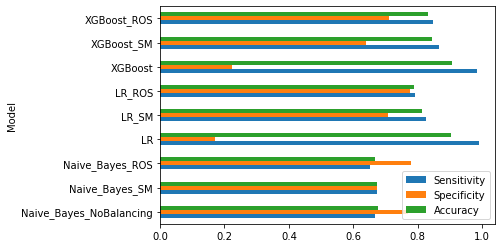

In [187]:
# plotting graph
Compare_Model_Metrics.plot(x="Model", y=["Sensitivity", "Specificity","Accuracy"], kind="barh")
plt.show()

###  XGBoost with random over sampling techique is giving good balance of Sensitivity, Specificity and Accuracy. Hence choosing XGBoost as the model to proceed further 

#### +++ Hyper parameter tuning for XGBoost Model +++

In [188]:
from sklearn.model_selection import RandomizedSearchCV

In [189]:
# A parameter grid for XGBoost
params = {
        'n_estimators':[200,500,800,1000],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [190]:
# Using Random search CV for hyper parameter tuning

folds = 3
param_comb = 100

xgb_tuned = XGBClassifier(learning_rate=0.02, objective='binary:logistic',
                    silent=True, nthread=1)

random_search = RandomizedSearchCV(xgb_tuned, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=3, verbose=3, random_state=1001 )

In [191]:
start_time = timer(None) # timing starts from this point for "start_time" variable

random_search.fit(X_train_ros,y_train_ros)

timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[07:25:42] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:25:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 6 hours 18 minutes and 36.2 seconds.


In [192]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

 Best normalized gini score for 3-fold search with 100 parameter combinations:
0.7253739768557719

 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.6}


In [193]:
# Seeking Score of the auto models

score_df = pd.DataFrame(random_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,271.781076,5.744353,0.914564,0.169767,1.0,500,5,3,0.5,0.8,"{'subsample': 1.0, 'n_estimators': 500, 'min_c...",0.778366,0.782882,0.787609,0.782952,0.003774,72
1,282.472857,4.566478,0.899605,0.220517,1.0,500,1,3,0.5,0.8,"{'subsample': 1.0, 'n_estimators': 500, 'min_c...",0.780835,0.784434,0.788386,0.784552,0.003083,68
2,310.123000,3.646376,0.673200,0.116582,0.8,500,5,4,5,0.6,"{'subsample': 0.8, 'n_estimators': 500, 'min_c...",0.801087,0.807437,0.803627,0.804050,0.002610,60
3,140.140537,6.109880,0.365024,0.012161,1.0,200,5,3,1,1.0,"{'subsample': 1.0, 'n_estimators': 200, 'min_c...",0.746260,0.750635,0.745484,0.747460,0.002268,99
4,165.422800,3.586057,0.607214,0.156007,0.6,200,5,5,2,0.6,"{'subsample': 0.6, 'n_estimators': 200, 'min_c...",0.775543,0.780200,0.779636,0.778460,0.002075,79


In [194]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_ros, dt_classifier.predict(X_train_ros)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_ros, dt_classifier.predict(X_train_ros)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [195]:
# Evaluating best model

evaluate_model(random_search.best_estimator_)

Train Accuracy : 0.8815739956722175
Train Confusion Matrix:
[[19924  1334]
 [ 3701 17557]]
--------------------------------------------------
Test Accuracy : 0.8061666666666667
Test Confusion Matrix:
[[ 475  150]
 [1013 4362]]


In [196]:
y_pred_xgb_tuned = random_search.predict(X_test)

In [197]:
y_pred_xgb_tuned

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [198]:
Accuracy_xgb_tuned=accuracy_score(y_test,y_pred_xgb_tuned)
Accuracy_xgb_tuned

0.8061666666666667

In [199]:
print(classification_report(y_test,y_pred_xgb_tuned))

              precision    recall  f1-score   support

           0       0.32      0.76      0.45       625
           1       0.97      0.81      0.88      5375

    accuracy                           0.81      6000
   macro avg       0.64      0.79      0.67      6000
weighted avg       0.90      0.81      0.84      6000



In [200]:
cf_xgb_tuned=confusion_matrix(y_test,y_pred_xgb_tuned)
cf_xgb_tuned

array([[ 475,  150],
       [1013, 4362]], dtype=int64)

In [201]:
TP = cf_xgb_tuned[1,1] # true positive 
TN = cf_xgb_tuned[0,0] # true negatives
FP = cf_xgb_tuned[0,1] # false positives
FN = cf_xgb_tuned[1,0] # false negatives

In [202]:
# Let's see the sensitivity of our LR model
Sensitivity_xgb_tuned=TP / float(TP+FN)
Sensitivity_xgb_tuned

0.8115348837209302

In [203]:
# Let us calculate specificity of our LR model
Specificity_xgb_tuned=TN / float(TN+FP)
Specificity_xgb_tuned

0.76

In [204]:
XGB_TUNED = {'Model':'XGBoost_Tuned', 'Sensitivity':Sensitivity_xgb_tuned, 'Specificity':Specificity_xgb_tuned, 'Accuracy':Accuracy_xgb_tuned}

In [205]:
Compare_Model_Metrics = Compare_Model_Metrics.append(XGB_TUNED, ignore_index=True)

In [206]:
Compare_Model_Metrics

,Model,Sensitivity,Specificity,Accuracy
0,Naive_Bayes_NoBalancing,0.665488,0.7696,0.676333
1,Naive_Bayes_SM,0.672930,0.6736,0.673000
2,Naive_Bayes_ROS,0.652465,0.7792,0.665667
3,LR,0.989023,0.1696,0.903667
4,LR_SM,0.824186,0.7072,0.812000
5,LR_ROS,0.789767,0.7744,0.788167
6,XGBoost,0.984558,0.2224,0.905167
7,XGBoost_SM,0.866233,0.6384,0.842500
8,XGBoost_ROS,0.845395,0.7120,0.831500
9,XGBoost_Tuned,0.811535,0.7600,0.806167


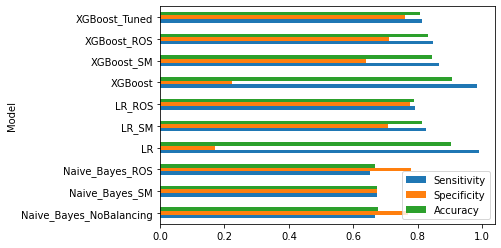

In [207]:
# plotting graph
Compare_Model_Metrics.plot(x="Model", y=["Sensitivity", "Specificity","Accuracy"], kind="barh")
plt.show()

#### +++ With tuned XGBoost model the train and test accuracy is 88 and 80 percent

In [208]:
# Saving the Model pickle file format
pickle.dump(random_search , open("xgbmodel.pkl",'wb'))

In [209]:
# test the dumped pickle file
model_test = pickle.load(open('xgbmodel.pkl','rb'))
model_test

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None, silent=True,
                                           subsample=None, tree_method=None,
                         

### +++ Recommendation System +++

In [210]:
reviews_raw_subset.head()

,product_id,user_id,reviews_rating,user_sentiment,Review_Comments_Cleaned
0,182,11441,5,1,awesomei love album good hip hop side current ...
1,140,6975,5,1,goodgood flavor review wa collected part promo...
2,140,6975,5,1,goodgood flavor
3,120,19328,1,0,disappointedi read review looking buying one c...
4,120,24206,1,0,irritationmy husband bought gel u gel caused i...


In [211]:
reviews_raw_rec = reviews_raw_subset[["product_id","user_id","reviews_rating","user_sentiment"]]

In [212]:
reviews_raw_rec.head()

,product_id,user_id,reviews_rating,user_sentiment
0,182,11441,5,1
1,140,6975,5,1
2,140,6975,5,1
3,120,19328,1,0
4,120,24206,1,0


In [213]:
# Test and Train split of the dataset.

train, test = train_test_split(reviews_raw_rec, test_size=0.30, random_state=31)

In [214]:
print(train.shape)
print(test.shape)

(21000, 4)
(9000, 4)


In [215]:
# Pivot the train reviews dataset into matrix format in which columns are products and the rows are user IDs.
df_pivot = train.pivot_table(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
).fillna(0)


df_pivot.head(3)

product_id,0,1,2,3,5,6,7,8,9,10,...,259,260,262,263,264,265,266,268,269,270
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [216]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [217]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x > 0 else 1)

In [218]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
).fillna(1)

In [219]:
dummy_train.head()

product_id,0,1,2,3,5,6,7,8,9,10,...,259,260,262,263,264,265,266,268,269,270
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is reviews_rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.



## Using Cosine Similarity

In [220]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [221]:
user_correlation.shape

(18253, 18253)

### Using adjusted Cosine

### Here, we are not removing the NaN values and calculating the mean only for the movies rated by the user

In [222]:
# Create a user-movie matrix.
df_pivot =  train.pivot_table(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
)

In [223]:
df_pivot.head()

product_id,0,1,2,3,5,6,7,8,9,10,...,259,260,262,263,264,265,266,268,269,270
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the movie for each user around 0 mean

In [224]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [225]:
df_subtracted.head()

product_id,0,1,2,3,5,6,7,8,9,10,...,259,260,262,263,264,265,266,268,269,270
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [226]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [227]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the products rating (as present in the reviews dataset). 

In [228]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [229]:
user_predicted_ratings.shape

(18253, 252)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero. 

In [230]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

product_id,0,1,2,3,5,6,7,8,9,10,...,259,260,262,263,264,265,266,268,269,270
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
# dump the user_final_rating in a pickle file
pickle.dump(user_final_rating, open('user_final_rating.pkl','wb'))

### Finding the top 5 recommendation for the *user*

In [232]:
# Take the user ID as input.
user_input = int(11441)
# user_input = int(input("Enter your user name"))
print(user_input)

11441


In [233]:
user_final_rating.head(2)

product_id,0,1,2,3,5,6,7,8,9,10,...,259,260,262,263,264,265,266,268,269,270
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d = d.to_frame()
d

,11441
product_id,
93,16.323714
244,7.939935
230,6.160020
9,4.776709
151,4.478607


In [235]:
#Mapping with Products with Brand and Category 
reviews_raw.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,Review_Comments,user_id,Review_Comments_Cleaned,product_id
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30,0,1,5,joshua,1,Just Awesomei love this album. it's very good....,11441,awesomei love album good hip hop side current ...,182


In [236]:
product_mapping = reviews_raw[["product_id","name","brand","categories"]]

In [237]:
# remove duplicates
product_mapping.drop_duplicates(subset="product_id",keep="first",inplace=True)

In [238]:
d = pd.merge(d,product_mapping,left_on='product_id',right_on='product_id', how = 'left')
d.head()

,product_id,11441,name,brand,categories
0,93,16.323714,Godzilla 3d Includes Digital Copy Ultraviolet ...,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur..."
1,244,7.939935,Tostitos Bite Size Tortilla Chips,Tostitos,"Food,Packaged Foods,Snacks,Chips & Pretzels,Fo..."
2,230,6.160020,Stargate (ws) (ultimate Edition) (director's C...,Lionsgate,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,..."
3,9,4.776709,Alex Cross (dvdvideo),Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In..."
4,151,4.478607,Mike Dave Need Wedding Dates (dvd + Digital),FOX,"Movies & TV Shows,Movies,Romance,Romantic Come..."


# Evaluation - User User 

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [239]:
# Find out the common users of test and train dataset.
common = test[test.user_id.isin(train.user_id)]
common.shape

(2049, 4)

In [240]:
common.head()

,product_id,user_id,reviews_rating,user_sentiment
20634,228,8568,5,1
26479,17,12001,1,1
15098,19,1384,5,1
17968,257,15897,5,1
28020,183,16738,5,1


In [241]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating')

In [242]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [243]:
df_subtracted.head(1)

product_id,0,1,2,3,5,6,7,8,9,10,...,259,260,262,263,264,265,266,268,269,270
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
user_correlation_df['user_id'] = df_subtracted.index
user_correlation_df.set_index('user_id',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18243,18244,18245,18246,18247,18248,18249,18250,18251,18252
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
common.head(1)

,product_id,user_id,reviews_rating,user_sentiment
20634,228,8568,5,1


In [246]:
list_name = common.user_id.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [247]:
user_correlation_df_1.shape

(1729, 18253)

In [248]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [249]:
user_correlation_df_3 = user_correlation_df_2.T

In [250]:
user_correlation_df_3.head()

,1,15,18,20,44,179,180,234,246,264,...,24735,24743,24753,24802,24805,24812,24828,24835,24837,24877
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
user_correlation_df_3.shape

(1729, 1729)

In [252]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [253]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user_id', columns='product_id', values='reviews_rating').fillna(0)

In [254]:
dummy_test.shape

(1729, 129)

In [255]:
# The below would give final user predicted ratings

common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [256]:
common_user_predicted_ratings.head(2)

product_id,1,4,9,10,14,15,17,19,20,21,...,254,256,257,258,260,263,264,268,269,270
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
common_user_predicted_ratings.shape

(1729, 129)

Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [258]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [259]:
common_ = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating')

In [260]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [261]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.47858598089464


In [262]:
# dump the common user's predicted rating in a pickle file
pickle.dump(common_user_predicted_ratings, open('common_user_predicted_ratings.pkl','wb'))

# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. In the user based similarity, we had taken mean for each user instead of each product. 

In [263]:
df_pivot = train.pivot_table(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
).T

df_pivot.head()

user_id,0,1,2,5,6,8,10,11,12,13,...,24901,24902,24904,24905,24906,24907,24910,24911,24912,24913
product_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the product rating for each product for using the Adujsted Cosine

In [264]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [265]:
df_subtracted.head()

user_id,0,1,2,5,6,8,10,11,12,13,...,24901,24902,24904,24905,24906,24907,24910,24911,24912,24913
product_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
# Finding the cosine similarity using pairwise distances approach
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00657044  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.00657044  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [267]:
# Filtering the correlation only for which the value is greater than 0. (Positively correlated)
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [268]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.02352264, 0.        ,
        0.        ],
       [0.        , 0.00117139, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04848007, 0.        , ..., 0.        , 0.        ,
        0.00338607],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00062228, 0.00066833,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00155569, 0.00167082,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03252811, 0.02122053,
        0.        ]])

In [269]:
item_predicted_ratings.shape

(18253, 252)

In [270]:
dummy_train.shape

(18253, 252)

### Filtering the rating only for the products not rated by the user for recommendation

In [271]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

product_id,0,1,2,3,5,6,7,8,9,10,...,259,260,262,263,264,265,266,268,269,270
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.023523,0.000000,0.000000
1,0.0,0.001171,0.0,0.0,0.0,0.0,0.0,0.0,0.003316,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.048480,0.0,0.0,0.0,0.0,0.0,0.0,0.014725,0.000000,...,0.0,0.0,0.0,0.006729,0.002859,0.0,0.0,0.000000,0.000000,0.003386
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001334,0.004255,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.001556,0.001671,0.000000
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001334,0.004255,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.001556,0.001671,0.000000


### Finding the top 5 recommendation for the *user*

In [272]:
# Take the user ID as input
# user_input = int(input("Enter your user name"))
user_input = int(1)
print(user_input)

1


In [273]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

product_id
59     0.014686
28     0.011828
57     0.010673
115    0.010139
71     0.009020
Name: 1, dtype: float64

In [274]:
# Product Mapping
d = pd.merge(d,product_mapping,left_on='product_id',right_on='product_id', how = 'left')
d.head()

,product_id,1,name,brand,categories
0,59,0.014686,Chips Deluxe Soft 'n Chewy Cookies,Chips Deluxe,"Food,Packaged Foods,Snacks,Cookies,Snacks, Coo..."
1,28,0.011828,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice...",Ben & Jerry's,"Food,Packaged Foods,Dairy & Dairy Substitutes,..."
2,57,0.010673,Chex Muddy Buddies Brownie Supreme Snack Mix,Chex,"Food,Packaged Foods,Snacks,Snacks, Cookies & C..."
3,115,0.010139,Jason Aldean - They Don't Know,Warner Music Group,"Music on CD or Vinyl,Country Music on CD or Vi..."
4,71,0.009020,"Coty Airspun Face Powder, Translucent Extra Co...",Coty,"Personal Care,Makeup,Concealer & Foundation,Fo..."


In [275]:
train_new = pd.merge(train,product_mapping,left_on='product_id',right_on='product_id',how='left')
train_new[train_new.user_id == 1] .head()

,product_id,user_id,reviews_rating,user_sentiment,name,brand,categories
11778,151,1,1,1,Mike Dave Need Wedding Dates (dvd + Digital),FOX,"Movies & TV Shows,Movies,Romance,Romantic Come..."


# Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [276]:
test.columns

Index(['product_id', 'user_id', 'reviews_rating', 'user_sentiment'], dtype='object')

In [277]:
common =  test[test.product_id.isin(train.product_id)]
common.shape

(8978, 4)

In [278]:
common.head(2)

,product_id,user_id,reviews_rating,user_sentiment
4332,107,20324,5,1
3434,176,10673,5,1


In [279]:
common_item_based_matrix = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating').T

In [280]:
common_item_based_matrix.shape

(199, 8372)

In [281]:
item_correlation_df = pd.DataFrame(item_correlation)

In [282]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
item_correlation_df['product_id'] = df_subtracted.index
item_correlation_df.set_index('product_id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
product_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
list_name = common.product_id.tolist()

In [285]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [286]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [287]:
item_correlation_df_3.head()

,0,1,5,7,8,9,10,13,14,15,...,256,257,258,260,263,264,266,268,269,270
product_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [288]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08080011, 0.06464009, ..., 0.01395515, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01951687, 0.        , 0.        , ..., 0.        , 0.00155569,
        0.00124456],
       [0.01273232, 0.        , 0.        , ..., 0.        , 0.00167082,
        0.00133665],
       [0.        , 0.00564345, 0.00451476, ..., 0.        , 0.        ,
        0.        ]])

In [289]:
common_item_predicted_ratings.shape

(199, 8372)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [290]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user_id', columns='product_id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [291]:
common_ = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating').T

In [292]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [293]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [294]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5602966218087095


### +++ User based recommendation system has lower RMSE value as compared to Item based, hence we will goahead with User based recommendation system +++

## +++ Integrate User-User recommendation system and Sentiments Model+++

In [295]:
user_final_rating.head()

product_id,0,1,2,3,5,6,7,8,9,10,...,259,260,262,263,264,265,266,268,269,270
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
user_final_rating.loc[11441].sort_values(ascending=False)[0:5]

product_id
93     16.323714
244     7.939935
230     6.160020
9       4.776709
151     4.478607
Name: 11441, dtype: float64

In [297]:
final_rec_ratings_based = user_final_rating.loc[11441].sort_values(ascending=False)[0:25]
final_rec_ratings_based = final_rec_ratings_based.to_frame()
final_rec_ratings_based

,11441
product_id,
93,16.323714
244,7.939935
230,6.160020
9,4.776709
151,4.478607
157,3.752777
268,3.333333
147,3.273268
107,3.273268


#### +++ Apply sentiment models on the reviews for the above product recommendation +++

In [298]:
# Merge final_rec_ratings_based with reviews_raw_subset dataframe which would have the reviews on which text pre=processing is done

prod_reviews = pd.merge(final_rec_ratings_based,reviews_raw_subset,left_on='product_id',right_on='product_id', how = 'left')
prod_reviews.head()

,product_id,11441,user_id,reviews_rating,user_sentiment,Review_Comments_Cleaned
0,93,16.323714,18858,1,1,awfulcould left one shelf great box
1,93,16.323714,22875,1,1,much worse expectedthis movie much worse expec...
2,93,16.323714,16814,1,0,dont get hypejust nt get hype godzilla frankly...
3,93,16.323714,153,1,0,best itema little disappointed like godzilla m...
4,93,16.323714,15118,1,0,good movie bad packagingit wa sale bought got ...


In [299]:
prod_reviews.shape

(9286, 6)

In [300]:
UniqueProductValues = prod_reviews['product_id'].unique()

In [301]:
len(UniqueProductValues)

25

In [302]:
model_test = pickle.load(open('xgbmodel.pkl','rb'))

In [410]:
# Create a dataframe to compute positive reviews percentage
prod_reviews_counter = prod_reviews["product_id"].value_counts().rename_axis('product_id').reset_index(name='Review_cnt')

In [411]:
prod_reviews_counter["Pos_rev_cnt"]=0
prod_reviews_counter["Neg_rev_cnt"]=0
prod_reviews_counter["Pos_rev_per"]=0

In [412]:
prod_reviews_counter

,product_id,Review_cnt,Pos_rev_cnt,Neg_rev_cnt,Pos_rev_per
0,93,3325,0,0,0
1,183,1143,0,0,0
2,151,757,0,0,0
3,157,668,0,0,0
4,141,412,0,0,0
5,107,362,0,0,0
6,268,348,0,0,0
7,178,310,0,0,0
8,244,264,0,0,0
9,76,247,0,0,0


In [413]:
final_rec_ratings_sentiment_based=pd.DataFrame()
for prod_id in UniqueProductValues:
    print ("For Prod id ",prod_id )
    if prod_id in prod_reviews_counter.product_id.values:
        prod_rev_cntr = prod_reviews_counter.loc[prod_reviews_counter["product_id"]==prod_id,"Review_cnt"]

        for i in range (0, int(prod_rev_cntr)):
            input1 = [prod_reviews.loc[prod_reviews["product_id"]==prod_id,"Review_Comments_Cleaned"].iloc[i]]
            print(input1)
            input_data = tfidfconverter.transform(input1).toarray()
            input_pred = model_test.predict(input_data)

            if input_pred[0] == 1:
                print("Review is Positive for " ,i)
                Pos_rev_cnt = prod_reviews_counter.loc[prod_reviews_counter["product_id"]==prod_id,"Pos_rev_cnt"].iloc[0]
                Pos_rev_cnt = Pos_rev_cnt + 1
                prod_reviews_counter.loc[prod_reviews_counter["product_id"]==prod_id,"Pos_rev_cnt"]=Pos_rev_cnt
#                 final_rec_ratings_sentiment_based = final_rec_ratings_sentiment_based.append({"product_id":prod_id}, ignore_index=True)
            else:
                print("Review is Negative for " ,i)
                Neg_rev_cnt = prod_reviews_counter.loc[prod_reviews_counter["product_id"]==prod_id,"Neg_rev_cnt"].iloc[0]
                Neg_rev_cnt = Neg_rev_cnt + 1
                prod_reviews_counter.loc[prod_reviews_counter["product_id"]==prod_id,"Neg_rev_cnt"]=Neg_rev_cnt



For Prod id  93
['awfulcould left one shelf great box']
Review is Negative for  0
['much worse expectedthis movie much worse expected broderick movie much better producer went back popular japanese format great teenager doe nt work adult']
Review is Positive for  1
['dont get hypejust nt get hype godzilla frankly movie wa boring build wa slow interesting even worth wa even disappointed hear pacific rim wa put hold godzilla v king kong anything like movie pas oh movie like original doe nt make good time changed update story would work new generation']
Review is Negative for  2
['best itema little disappointed like godzilla movie year back']
Review is Negative for  3
['good movie bad packagingit wa sale bought got case wa broken half witch suck lot least disk ok guess order online happens']
Review is Negative for  4
['product wa advertisednot advertised wa suppose metalpak ordinary plastic case could bought thing somewhere else cheaper']
Review is Negative for  5
['plot directing writing

['godzilla remakethis wa pretty good remake movie took time develop story wa bit disappointed lack story telling star godzilla wa nt bad']
Review is Negative for  73
['movie okay ersthe movie wa slow beginning end wa grest']
Review is Negative for  74
['worth buyingnot thought would disappointed']
Review is Negative for  75
['expectedmovie wa good preview led one believe would bought known dragged wa']
Review is Positive for  76
['best worsti bought husband thinking wa total guy movie even said wa alright']
Review is Negative for  77
['original wa betterthe original still best bad good action wa great course got boring fast']
Review is Positive for  78
['cool moviegood movie little disappointed effect every time showed monster picture wa dark hard make detail']
Review is Negative for  79
['weakest godzilla everrrrrrthis movie wa disappointment godzilla hardly appears movie worst godzilla eevvveeerrrrr graphic give star nt get bluray sorry']
Review is Negative for  80
['ok movie see sec

['fun film great experienceit hard beat king monsters want classic story line link old new monster mash']
Review is Positive for  148
['good lame japanese carry funwatch remember old black white original japan']
Review is Positive for  149
['must seebought movie son love godzilla movie boring']
Review is Negative for  150
['kid old movie tried get son insisted missing much']
Review is Negative for  151
['remastered version godzillai wa expecting another movie godzilla waking destroying thing wa nt movie wa revamped version movie cartoon added storyline human choppy easy figure']
Review is Positive for  152
['alot buildup sequel grew loving godzilla reincarnation wa decent best perhaps sequel really good know least matthew broderick']
Review is Positive for  153
['worth watchingit wa better expected could shown godzilla better action scene']
Review is Positive for  154
['godzilla moviethis movie wa better others seen still bad acting']
Review is Negative for  155
['get monster king kong

['unexpected endinglike old godzilla movie acting wa poor ever special effect good role godzilla hero wa suprise']
Review is Positive for  221
['godzilla godzilla fan since childhood wa bit disappointed fact godzilla wa nt movie alot time many scene night limited viewing enjoyment experience monster looked like metal mechanical toy nevertheless would mend movie others long knew expect way godzilla presence movie']
Review is Negative for  222
['badworth seeing good acting story ok godzilla looked little odd nt show much']
Review is Positive for  223
['good kid moviegrandson loved good nd part original saw kid']
Review is Positive for  224
['husband like special effectsthe special effect movie wa great nt concentrate enough godzilla']
Review is Positive for  225
['high expectationsi guess high expectation movie movie wa ok effect also ok']
Review is Positive for  226
['best monster movienot old godzilla movie movie dragged nt lot action destruction']
Review is Positive for  227
['good mo

['godzillaclassic godzilla storyline good special effect']
Review is Positive for  279
['wa good movieit wa long movie got bit boring good clean family movie']
Review is Positive for  280
['good movie second remakemovie wa good enough godzillamaybe third one way']
Review is Positive for  281
['good movietoo much talking enough monster overall good movie']
Review is Positive for  282
['great effect great storylinei wa extremely disappointed movie really wa little godzilla actual movie effect enough keep watching would watch']
Review is Negative for  283
['little better averagehow love godzilla wish thought main character']
Review is Positive for  284
['decent moviedecent movie plenty effect overall average great bad either']
Review is Negative for  285
['ok move keds much bloodthe move godzella wa ok like old one']
Review is Negative for  286
['fun movie dbrings back childhood memory watching monster movie school american version trounces one would liked seen godzilla history evolution 

['ok nothing better dook nothing better special effect good story little lacking']
Review is Positive for  354
['average movieif seen one godzilla movie seen']
Review is Negative for  355
['good effectsthe story line wa average loved effect']
Review is Positive for  356
['bad good movie started little slow middle great climax']
Review is Negative for  357
['another godzilla movienot big godzilla fan figured would give try well like summary say another godzilla movie quality good even liked pacific rim']
Review is Positive for  358
['good movie great price best buythe movie wa good waited way long actually see godzilla hope next one ha scene godzillabest buy best price']
Review is Positive for  359
['typical godzillathank god bryan cranston otherwise would snoozer ol godzilla hardly totally set movie sequel']
Review is Negative for  360
['godzillaa nice relaunch series filmed well visually similar pacific rim quite good']
Review is Positive for  361
['classicgreat approach old godzilla 

['good moviei seen movie theatre wanted copy home viewing good movie']
Review is Positive for  426
['godzillathis version godzilla ok special effect good']
Review is Positive for  427
['great moviei love kind movie looks good sound good']
Review is Positive for  428
['good moviethis movie wa pretty good good first one']
Review is Positive for  429
['good expectedthe fight scene plete confusing jump story felt plete']
Review is Negative for  430
['great actionpacked action good start finish needs godzilla']
Review is Positive for  431
['surprisingly meh giant monster moviewhile one way better roland emmerich travesty starring matthew broderick still saying much reverential approach right script boneheaded wrong almost impossible stay interested first hour way much family drama go totally nowhere second hour brings little giant monster battle goodness movie cut away action way muchthe nt great least epson projector tons ghosting especially dark monster battle scene movie wa nt shot conve

Review is Negative for  496
['fun better expectedthis movie wa fun watch one better modern adaptation monster never get old']
Review is Positive for  497
['good moviehas good special effect average plot expecting']
Review is Positive for  498
['underrated moviegreat film overall good use suspense fun take original']
Review is Positive for  499
['godzillathis godzilla fan waiting much closer toho picture although still flawed enjoyable none le']
Review is Negative for  500
['entertainingthis movie held attention part movie day age ok']
Review is Negative for  501
['different takeit another rehashing plot change make quite interesting enjoyed difference version']
Review is Positive for  502
['good movied wa ok nt pop movie wa good story plot considering subject']
Review is Positive for  503
['great moviegreat movie watched time already']
Review is Positive for  504
['better film soundbarplease watch sound bar quality sound phenomenal overshadow poor monster story line depressive humanist

Review is Positive for  568
['godzilla lazer beamsanother adaptation godzilla variety godzilla take radiationconsuming alien laser beam nicely put together blue beam death']
Review is Negative for  569
['better past onesthe movie wa pretty good would liked see godzilla']
Review is Positive for  570
['good filmpredictable still fun watch modern take classic monster']
Review is Positive for  571
['decent updated godzilla spoiler alert think lack little bit classic godzilla element still put good show seems focus much godzilla enemy main character sob story leaf wanting battle godzilla enemy doe nt really come end movie lack comparison older counterpart time begs sequel hope next one godzilla entertaining movie']
Review is Positive for  572
['entertaining moviethis rendition godzilla wa better one wa previously made matthew broderick']
Review is Positive for  573
['good greati enjoyed movie great good star']
Review is Positive for  574
['wish wa nt ultravioletreally enjoyed story despite 

['great moviei used love old godzilla flick wa looking forward one nt enjoy much theatre first time watched tho gave another chance thru rental really like bought price tag helped']
Review is Positive for  640
['oh godzilla best godzilla movie hand especially compared adaptation']
Review is Positive for  641
['sound system must moviegood movie showing surround system visitor']
Review is Negative for  642
['gojira gojira wish wa cranston wa really good mend thousand time better godzilla']
Review is Positive for  643
['favoriteone favorite movie past year godzilla']
Review is Positive for  644
['finally real us godzilla well doe focus human character much godzilla scene make totally worthwhile great fight end still enjoy toho film optimistic sequel']
Review is Positive for  645
['titles greatuse frame slow motion read stuff get wiped opening credit hilarious']
Review is Negative for  646
['superb monster flickawesome movie big tv godzilla play hero']
Review is Negative for  647
['ok fikm

Review is Positive for  711
['godzilla best could ask american remake godzilla usually hate american version foreign film one great']
Review is Positive for  712
['king monstersthis movie reminds wa kid growing watching godzilla still enjoy watching godzilla rule']
Review is Positive for  713
['best godzilla madegreat movie nice quality product fast delivery']
Review is Positive for  714
['great story greatlooking godzillathis wa lot fun watch love cheesy godzilla movie one wa serious done well monster super cool']
Review is Positive for  715
['well done moviei use look series tv liked movie']
Review is Positive for  716
['son likes itmy son wanted show movie group friend liked']
Review is Negative for  717
['good remake godzillai love cast movie good entertaininggodzilla wa gigantic fearsome sure would like see monster meet kong skull island box office hit']
Review is Positive for  718
['great moviestable story line super graphic believable action']
Review is Positive for  719
['godzi

['great movie good originalgreat movie good original excellent color acting average good extra']
Review is Positive for  783
['loved moviei saw movie theaters knew get bluray entertaining plot good acting wife normally nt like movies like really enjoyed well']
Review is Positive for  784
['great filma legend reborn original monster godzilla cinema wa excellent special effect awesome acting wa ok fight scene monster wa amazing around great film']
Review is Positive for  785
['lot actionmissed theater bought version wa great']
Review is Negative for  786
['godzilla livesthis great new take godzilla like took new approach instead got special effect great best way watch bluray']
Review is Positive for  787
['king monsters back great movie godzilla fan big guy make appearance take really enjoyable watch home theater well surround sound superb one']
Review is Positive for  788
['great movie like sci fii enjoyed brought back memory watching godzilla movie younger year']
Review is Positive for

['good reboota great movie fan even pretty fun watch apart actor two bit overacting worth adding collection sure']
Review is Positive for  834
['great moviemovie great great package uv paper came without code best buy fault']
Review is Positive for  835
['great sound visual effectsi amazing sound system movie really justice visual effect also really good plot movie wa nt half baked either']
Review is Positive for  836
['awesomeenjoyed movie came feature cool well definitely must buy godzilla monster fan light year better godzilla abomination matthew broderick']
Review is Positive for  837
['good quality lacking extrasthe movie wa good nothing stellar solid giant monster movie definitely better godzilla reboot spicture audio excellent bluray menus easy navigate complaint nt many extra feature']
Review is Positive for  838
['greatgreat movie really brings effect']
Review is Negative for  839
['fun movie great priceinadvertently took advantage blu purchase hannibal great blind buy deal mo

Review is Positive for  891
['better expected heard lot people movie wa great watching wa bad really liked']
Review is Positive for  892
['king monsters makes return sort fan giant lizard japan wa hoping little back story origin seems writer got sidetracked overall movie wa good']
Review is Negative for  893
['love godzillai watching big g since wa kid firm far better justice sony']
Review is Positive for  894
['great godzilla movie wa great revamp godzilla series disappointing zilla wa breath fresh air great fight scene']
Review is Positive for  895
['good movieit nice see new godzilla movie one ha good story awesome special effect science fiction movie mend movie']
Review is Positive for  896
['grew godzillafinally godzilla movie right track loved']
Review is Positive for  897
['king return godzilla return big screen fun ride take time get going stick though time get third act get monster fighting action want mended']
Review is Negative for  898
['better must gdzilla moviesnot bad st

['good movieit best godzilla decade ha actual story follow wa surprised much enjoyed could better minor grievance']
Review is Positive for  963
['awesome special effectspeople nt give movie enough credit great sci fi flick awesome special effect want good monster v monster action must see']
Review is Positive for  964
['godzilla back much better bust matthew broderick interesting see monster would exist current society']
Review is Positive for  965
['decent modern day monster moviei watched movie expecting much came surprised fight scene fun watch animation wa good overall suspend disbelief enjoy']
Review is Positive for  966
['great storygreat story lighting dark movie']
Review is Positive for  967
['great reboot great franchisewhile wa nt greatest godzilla movie wa much better one']
Review is Positive for  968
['good moviei liked movie ok story line good military action']
Review is Positive for  969
['excellent moviefinally godzilla invokes original like misfit one several year ago g

['loved itsound video quality great godzilla movie reintroducing damaged character america slow build reveal payoff']
Review is Positive for  1020
['good moviei really expected follow godzilla new york city wa little disappiointing']
Review is Negative for  1021
['best movie ever enjoy much like old movie godzilla maybe little better']
Review is Positive for  1022
['king monstersthe movie way better expected wish fight scene monster wa longer showed godzilla worth buying watching nonetheless']
Review is Positive for  1023
['good old fashion monster moviegood monster movie keep traditional godzilla movie']
Review is Positive for  1024
['oh go tokyo liked one made clunker got back great action great special effect look great doe slow way action slows ramp right back']
Review is Positive for  1025
['forget matthew broderik film much better roland emmerich film godzilla given monster fight like king kong version gave u hopefully sequel monster time wa fun']
Review is Positive for  1026
['c

['good moviethe movie held interest wa interesting watch']
Review is Positive for  1077
['great moviegreat movie price would mend anyone watched old godzillas']
Review is Positive for  1078
['godzilla bestit annoys hear critic people complaining dramatic depth human character godzilla movie rules leave']
Review is Negative for  1079
['great movegreat move different needed plot mend anyone like godzilla movie']
Review is Negative for  1080
['awesome movie great video audio qualityas movie great look sound amazing peoples biggest issue lack godzilla lot film however ha']
Review is Positive for  1081
['great movie familythis movie wa seriously massive upgrade movie enjoyed quite well']
Review is Positive for  1082
['reboot godzillathe reboot godzilla definitely played original movie matthew broderick one wa much type godzilla wa good guy still cause major damage everything around enjoyable though plenty action destruction']
Review is Positive for  1083
['really coolreally loved special ef

Review is Positive for  1145
['great monster remakealthough bryan cranston made appearance commercial wa surprised great monster remake effect went beyond']
Review is Positive for  1146
['good take old monster flicki like monsterscifi movie bit bias wa good monster movie lot low end good sub house wa shaking']
Review is Positive for  1147
['goodhow go wrong godzilla action packed movie']
Review is Positive for  1148
['great moviejust gave spin ht bad def mend']
Review is Positive for  1149
['good godzilla updatei remember poorly made godzilla movie lot cheesey prop movie better version better plot']
Review is Positive for  1150
['godzillaalways fan old godzilla moviesthis one wa good seemed focus mantrasinstead godzilla']
Review is Positive for  1151
['godzilla awesomethis new version godzilla like modern throwback classic godzilla movie worth watching moment godzilla enters movie']
Review is Negative for  1152
['nice reboot established scifi charicteri really enjoyed movie familiar or

['great moviei liked movie better first movie year ago']
Review is Positive for  1215
['godzilla pretty good cool special effect decent story better one would expect matthew broderick movie would enjoyed seeing little guy godzilla fighting day night']
Review is Positive for  1216
['godzillawhat else say da kid love godzilla']
Review is Negative for  1217
['good movielots action pretty clean today standard like godzilla movie seen']
Review is Positive for  1218
['godzillaaaa thought movie overall wa pretty good thought could scene godzilla muto allinall good movie']
Review is Positive for  1219
['good typemy husband loved type movie wa good guess']
Review is Positive for  1220
['entertainingnot bad still make one miss old movie kid seem enjoy']
Review is Negative for  1221
['godzilla reinventedawesome movie aggressive godzilla']
Review is Negative for  1222
['good actiongood action could use little godzilla scene action']
Review is Positive for  1223
['decent moviei purchased without se

['much better godzilla moviethough take get real monster fight well worth set sequel']
Review is Positive for  1309
['overall good godzillamuch better last remake overall good movie']
Review is Positive for  1310
['solid rebootgodzilla solid reboot classic may weight original gojira offer strong take classic character']
Review is Positive for  1311
['better second timesaw theater liked ok liked lot watching blu ray impressive effect better average story']
Review is Positive for  1312
['loved godzilla love movie got cheap price thanks certificate']
Review is Positive for  1313
['good moviegood movie heard friend product wa promised']
Review is Positive for  1314
['e st century godzilla got kick remake e st century godzilla hope next movie good']
Review is Positive for  1315
['nice summer escapefun new twist godzilla story decent special effect little slow time enjoyable']
Review is Positive for  1316
['worth seeinggood movie great definitely worth seeing good special effect']
Review is 

['good remakebryan cranston mantoo bad nt get little screen time film']
Review is Negative for  1369
['decent flickgood action storynot enough godzilla enjoyed']
Review is Positive for  1370
['great reboot godzilla original betterbryan cranston nice job overacting minute wa movie godzilla monster though steal show despite foreign criticism godzilla look fat']
Review is Positive for  1371
['entertaininggreat movie godzilla fan bit far fetched however overall solid action movie']
Review is Negative for  1372
['excellent remakei hope make another wa great movie finally show godzilla one others']
Review is Positive for  1373
['great moviebetter lot godzilla movie came past start slow pick']
Review is Positive for  1374
['godzilla need say moregodzilla ha come long way since day black white']
Review is Negative for  1375
['great movie good timegreat movie shipped fast recieved fast ca nt complain would definitely buy']
Review is Positive for  1376
['awesome fight scenesit really cool godzil

Review is Positive for  1461
['godzilla waiting fun movie especially good got great sound system']
Review is Positive for  1462
['entertainingit wa different remembered child worth purchase']
Review is Negative for  1463
['great moviedo nt listen people said movie wa nt good enjoy every time watch action packed great cast amazing special effect']
Review is Positive for  1464
['godzilla vs mothra liked good monster monster fight scene decent character development wa reminded much old school godzilla v monster prefer seeing good ole romp city']
Review is Positive for  1465
['epic godzilla moviethe whole movie build epic ending definitely godzilla movie focused human story']
Review is Negative for  1466
['watchinggood movie like original still like quality wa good']
Review is Positive for  1467
['epic godzilla great movie good special effect film never try make anyone forget original godzilla']
Review is Positive for  1468
['godzilla back people know godzilla even never seen film truly po

['good moviei really enjoyed movie different good']
Review is Positive for  1531
['godzilla revamped godzilla actually look really good movie captures original godzilla made modern version look amazing']
Review is Positive for  1532
['godzilla life little different twist ageold monster story']
Review is Negative for  1533
['kids loved itmy kid like movie']
Review is Negative for  1534
['kid loveded itgood graphic storyline main character make stupid decision usually drive crazy']
Review is Negative for  1535
['fun escape moviedefinitely oscar worthy good entertainment type movie decent special effect better production value original godzilla way back']
Review is Positive for  1536
['great movieawsome movie brings back old memory original godzilla']
Review is Positive for  1537
['godzilla still kingthe good news toho ltd ha released multitude monster sequel mean rodan ghidrah mechagodzilla etcthe bad news take hour even see godzilla back story unfoldsnot boring even original brought mon

['great movie godizilla collectiowas best godizilla movie long time much better mathew broderick one']
Review is Positive for  1601
['godzilla backit wa good movie loved story everything movie']
Review is Positive for  1602
['cool movieawesome movie even better problem disk packaging']
Review is Positive for  1603
['love movie love nt fully reveal godzilla till end also opening scene godzilla us similar setting jp utilizes helicopter']
Review is Negative for  1604
['amazing sound qualitythe best sound quality blu ray experienced long time']
Review is Positive for  1605
['loved saw movie theater thought wa one better movie seen long time bought']
Review is Positive for  1606
['nostalgic movie loverok blast past decent acting main character bad look']
Review is Negative for  1607
['movie goodmy husband loved movie think godzilla movie awesome']
Review is Positive for  1608
['best fight scene since jet li fought jet ligodzilla wa fantastic full action fight scene godzilla thing must see m

['great moviethis one best godzilla movie long time']
Review is Positive for  1666
['made love aarontaylor johnson olseni loved movie amazing production check']
Review is Positive for  1667
['great movieliked story wa different first godzilla']
Review is Positive for  1668
['great reboot moviethis movie good movie best buy good price']
Review is Positive for  1669
['roaaaar great movie incredible saw time']
Review is Positive for  1670
['new classici grew watching godzilla tv bought nephew wa hit']
Review is Negative for  1671
['good moviei really liked movie much better last version wa made']
Review is Positive for  1672
['classic redone well version godzilla credit franchise action tremendous cgi wonderfully done human interest portion film add detracts enjoyment bryan cranston terrific american scientist joe brody discovers something amiss japan ca nt get anyone take seriously brody fear e realized muto massive unidentified terrestrial organism awakens long slumber terrorize world g

['godzillaif godzilla movie fan like movie']
Review is Negative for  1752
['excellent movieexcellent movie great special effect display']
Review is Positive for  1753
['great dthis movie great especially ca nt wait see take godzilla franchise next']
Review is Positive for  1754
['great action moviethis another remake classic godzilla movie']
Review is Positive for  1755
['excellent qualitygood movie watched lg ktv loved']
Review is Positive for  1756
['classic remadea classic remade date one best godzilla movie date']
Review is Positive for  1757
['great moviemuch better reboot great action monster battle']
Review is Positive for  1758
['movie junkiegreat movie love']
Review is Negative for  1759
['godzilla godzilla movie good bad history godzilla evolved cinema best version far']
Review is Positive for  1760
['great movieworth money great action best storyline enjoyed every minutesthanks digital content watch movie anywhere']
Review is Positive for  1761
['fun moviegodzilla wa great t

['action packedthis revised edition movie graphic sound effect awesome movie must video library love']
Review is Positive for  1812
['awesome movie quality movie amazing really enjoy watching film']
Review is Positive for  1813
['good moviegodzilla wa great purchase really enjoyed personal service best buy']
Review is Positive for  1814
['rawr scary monster review movie product nt know anyway great movie silly dialogue walter white conspiracy theorist quicksilver squint pout slow much godzilla fat still ha asain people still afraid gojira']
Review is Negative for  1815
['great godzilla moviei really enjoyed godzilla movie look great blu ray']
Review is Positive for  1816
['greatgreat movie could nt wait watch wa great really enjoy']
Review is Positive for  1817
['great moviegodzilla one old time favorites great']
Review is Positive for  1818
['great godzillathe excellent story better expected leaps bound better mess']
Review is Positive for  1819
['godzilla backthis movie ha human prob

['grandson love godzilla moviegrandson ha watched movie several time love']
Review is Negative for  1905
['cool movievery easy buy would mend fast delivery']
Review is Positive for  1906
['cool adaptationthis cool adaptation great vfx worth watching bluray surround sound']
Review is Positive for  1907
['underrated feeli think excellent movie ha tension suspense gap story pretty good climax']
Review is Positive for  1908
['movie would mend anyoneif like godzilla movie definitely enjoy one character designed resemble original godzilla']
Review is Positive for  1909
['great moviesaw theater great movie beginning ultimate reptile nice action sequence acting fall little flat overall great movie hopefully see sequel come along']
Review is Positive for  1910
['better expectedlove movie great build story ready sequel']
Review is Positive for  1911
['great moviei liked godzilla lot computer graphic well done']
Review is Positive for  1912
['excellent movieexcellent movie great sound special eff

['great moviespoiler alert movie tie kong skull island monarch']
Review is Negative for  1977
['godzilla rule great movie wish one character lasted longer movie oh well mend one stop godzilla']
Review is Positive for  1978
['godzilla best one yet loved story line excellent baddie godzilla hero dvd work advertiseda good buy']
Review is Positive for  1979
['awesome thoroughly enjoyed loved movie sure bryan cranston could played larger role even without movie kept interesting throughout multi watch movie sure']
Review is Positive for  1980
['excellent dgreat action film well made awesome picture quality']
Review is Positive for  1981
['great moviegreat movie good quality blu ray watched twice']
Review is Positive for  1982
['ongoin collectionits mutch better bluray standard dvd defenatly worth converting blu ray']
Review is Positive for  1983
['fun dark moviemuch darker previous godzillaintheus movie still great film call gritty guess well worth best buy wa asking purchased']
Review is Po

Review is Positive for  2048
['good plot excellent cinematographythe movie ha good action good acting quite different original']
Review is Positive for  2049
['awesomeawesome deal since wa free bluray player wa neat']
Review is Positive for  2050
['best godzilla movie since originalbuy worth money best godzilla movie since beginning']
Review is Positive for  2051
['great movie surprisingly fun wa worried film would cheesy wa great perfectly paced action human interest character development great']
Review is Positive for  2052
['great movie brings back memoriesthis bluray movie superb film made bluray special effect terrific story good well anyone remembers original godzilla movie find entertaining']
Review is Positive for  2053
['still bos back vengeance awesome special effect godzilla still rule year need sequel please']
Review is Positive for  2054
['great movie brings back childhood loved movie buy cg movie really incredible ca nt even tell time definitely watch special feature prod

Review is Negative for  2110
['great action moviegreat fun action enjoyed maybe little intense small child older kid ok']
Review is Positive for  2111
['good dvdthis wa husband kid loved mend']
Review is Positive for  2112
['godzillai capability year finally decided try wa great always like godzilla movie including black white version watched kid wa wa good']
Review is Positive for  2113
['must audio alonethere many complaint online little titular monster movie moment show jaw dropping way nt get goosebump airport scene nt know say dts audio help sell scene enough low end rumble make soundfeel like monster fighting living roomoverall film great summer fun weak link exist could nt stop grinning like idiot throughout run time']
Review is Positive for  2114
['new godzilla best yetsaw movie twice theater best blue ray hope make sequel movie keeper godzilla fan']
Review is Positive for  2115
['king monstersexcellent reboot worth time viewingbeware project monarch']
Review is Negative for  2

['best godzilla movie ever must watch godzilla movie highly mend']
Review is Positive for  2190
['great movie highly mendgreat movie great special effects highly mend']
Review is Positive for  2191
['epic movie fan godzilla since wa kid movie definitely lived name ton action']
Review is Positive for  2192
['awesome movielove hospitality best buy everything everyone awesome']
Review is Positive for  2193
['great monster moviei actually felt like wa watching monster movie giant dinosaur running around city']
Review is Negative for  2194
['great movie dgood movie watch especially liked']
Review is Positive for  2195
['great movie godzilla fansgreat movie fan old time godzilla movie']
Review is Positive for  2196
['best godzilla movie waiting finally godzilla movie wa made true root action suspense drama would get people hooked beginning end one favorite summer movie ca nt wait see future']
Review is Positive for  2197
['awesome moviebest godzilla movie yet always good guy protector real m

['godzillabooklet wa good great movie look movie home great sometime see think miss talking movie theater']
Review is Positive for  2265
['better expectedwas nt sure wa going like ended coworker friend everyone ha seen since told liked well']
Review is Positive for  2266
['great movie great movie waited bluray release watch first time wa well worth extra great']
Review is Positive for  2267
['godzillai bought movie awesome']
Review is Positive for  2268
['great moviegood reboot godzilla series looking forward']
Review is Positive for  2269
['great moviethis version reminds original far better last version godzilla']
Review is Positive for  2270
['godzilla new generationi going give away detail film acting good cgi amazing longtime godzilla fan may may appreciate film pretty sure er wait sequel']
Review is Positive for  2271
['bryan cranston set tonethe craze reboot movie tv show movie already rebooted etc actually handled great care godzilla origin story godzilla metaphor hiroshima nag

Review is Negative for  2342
['great new versionthis great reimagining king monsters']
Review is Positive for  2343
['movie year absolutely great movie would mend anybody want watch great one']
Review is Positive for  2344
['awesome moviegreat remake old classic love battle scene']
Review is Positive for  2345
['goodreally really good movie watched twice two day']
Review is Positive for  2346
['great effectsloved movie really idea going godzilla wa actually misunderstood good guy bravo']
Review is Positive for  2347
['best reboot ever first time watching movie theater wa amazing experience watch dvd worthwhile movie one best ever action sequence visual effect phenomenal well worth']
Review is Positive for  2348
['lovedsounds really nice surround sound wa entertaining movie']
Review is Positive for  2349
['gojira godzilla fan godzilla movie corny fan godzilla still appreciate work remake good reigning king monsters made big comeback loved wa awesome']
Review is Positive for  2350
['grea

['everything godzilla movie bevery story driven monster action well worth wait']
Review is Positive for  2434
['great movie military godzilla fanthis movie wa great far effect storyline creativity go think godzilla wa introduced little late film would liked see overall enjoyed would definitely mend']
Review is Positive for  2435
['excellentloved movie excellent story line well']
Review is Positive for  2436
['great dvd true fangodzilla time favorite monster truly enjoyed movie giving two thumb']
Review is Positive for  2437
['great remakethis godzilla movie wa much better last one wa made would highly mend movie']
Review is Positive for  2438
['great godzilla movie stray toho way making great godzilla movie']
Review is Positive for  2439
['great movie great movie enjoyed home get']
Review is Positive for  2440
['awesome movie awesome movie son ha watching repeat last day lots action']
Review is Positive for  2441
['great moviegreat movie lot action effect wa great ca nt wait next one c

['must godzilla fansa classic godzilla movie collection missed movie chance watch']
Review is Negative for  2494
['great moviegreat movie comes bluray dvd disk']
Review is Negative for  2495
['awesome movie watch godzilla wa awesome movie watch watch like thousand time']
Review is Negative for  2496
['great great movie amazing visuals story character']
Review is Positive for  2497
['godzilla backi huge fan godzilla year hiatus movie came stomping back heart ever left move cgi godzilla work monster battle plain compared older movie movie sound look incredible build godzilla first min movie make one grand entrance true godzilla style dose give go monster movie night toss']
Review is Negative for  2498
['great movie buythis movie came good condition great price think buy movie store']
Review is Positive for  2499
['great movie agesgodzilla family favorite science fiction enhanced new movie technology']
Review is Positive for  2500
['great movie great package dealthis package give bluray r

Review is Positive for  2577
['great godzilla monster movie nt overbearing acting good elizabeth olsen']
Review is Positive for  2578
['new vision respectthis film pay tribute remembers godzilla rich cinematic history ha edge excitement modern special effect story back well many nod classic worth bluray']
Review is Positive for  2579
['great moviei really enjoyed version godzilla special effect cinematography plus cast excellent problem wa ordered metalpak best buy sent regular blurry cancelled replacement']
Review is Positive for  2580
['great movieperfect movie family time pop bag popcorn set action']
Review is Positive for  2581
['great movieif like new godzilla movie like']
Review is Negative for  2582
['wa awesome moviei wa impressed movie thing wish godzilla would movie class ca nt wait sequel']
Review is Negative for  2583
['great moviefor anyone like old godzilla movie movie keep entertained first half little slow going pick great effect outstanding']
Review is Negative for  25

['godzilla back old school real godzilla waiting buy']
Review is Negative for  2658
['great moviegreat movie even better blu ray would mend movie friend family']
Review is Positive for  2659
['dvd purchasegodzilla wa lot fun watch great buy best buy must see']
Review is Positive for  2660
['excellentmy son really enjoyed watching movie']
Review is Positive for  2661
['great picturewe purchased tv picture quality wa good took back saw tv picture wa great wa great price']
Review is Positive for  2662
['great godzilla retellingif like monster movie like godzilla especially version action great surprisingly instilled emotion nt think hard going doe nt really make sense']
Review is Positive for  2663
['worth buybest godzilla movie seen fight scene best monster fight']
Review is Positive for  2664
['great moviewas good tribute original film pace look']
Review is Positive for  2665
['fantasticthis wa whole lot better movie must see everyone']
Review is Positive for  2666
['awesome movie godzi

['great movie big godzilla fangreat start new generation godzilla fan needs godzilla le love story decent none le']
Review is Positive for  2732
['great movieif godzilla fan love movie like boyfriend doe']
Review is Positive for  2733
['great special effectsthe special fx wa awesome version make even better']
Review is Positive for  2734
['great moviethis one best movie definitely mend']
Review is Positive for  2735
['awesome moviethe price wa great movie wa pretty good']
Review is Positive for  2736
['great moviethis movie well made interesting plot']
Review is Positive for  2737
['great sci fi fansgreat visual effect great sound home theater system']
Review is Positive for  2738
['yes amazing movie loved way better version came year back']
Review is Positive for  2739
['like godzillas chubbyi wa elated remake action scene intense overall feel movie wa update wa looking couple favorite star godzilla fluffy state well worth owning saw imax theatre family wa interested going later watch

['excellent hash classic cgi look greatgreat story great hash classic beat godzilla released assume far cgi awesome video game style like spiderman yuck']
Review is Positive for  2808
['rawr nt think would like movie wa awesome p']
Review is Negative for  2809
['wowgreat movie jumping seat']
Review is Negative for  2810
['great moviethis movie wa lot better thought']
Review is Positive for  2811
['awesome wa awesome movie loved action packed']
Review is Positive for  2812
['great moviegreat story great effect great sound liked movie lot']
Review is Positive for  2813
['kaiju carnage movie awesome godzilla really tear']
Review is Positive for  2814
['great godzilla movie great great great great great godzilla movie movie wa greater']
Review is Positive for  2815
['awesome moviegreat movie great price even better stunning']
Review is Positive for  2816
['gojira rocksawesome movie almost good kid watched saturday morning']
Review is Negative for  2817
['great moviegodzilla great movie bri

['great set godzilla loverif fan godzilla would good purchase get every version need good movie use capability']
Review is Positive for  2882
['king monster return fan ever since wa child even seen original gojira return made movie great bringing theme newer audience godzilla delivers']
Review is Positive for  2883
['love lifelong godzilla fan wa impressed way movie wa done remained faithful japanese godzilla anerican feel']
Review is Positive for  2884
['must havefun thrill ride new twist king monster godzilla v king kong ca nt wait']
Review is Negative for  2885
['good quality blu raygood price good quality great movie keep getting blu rays best buy']
Review is Positive for  2886
['godzilla futurepaki mend version film movie lover fan collector couple dollar get collectable metal pack includes blu ray dvd plus digital download like doe nt sound good enough already button roar']
Review is Negative for  2887
['godzilla fan watch outthis movie wa great new generation godzilla fan well t

['great moviei loved movie great actorsgreat scenes great story']
Review is Positive for  2976
['great movie loved usually big fan reboots never got original godzillas nt like matthew broderick version wa excited one absolutely loved nerdy friend nitpick v original someone really seeing story first time wa awesome']
Review is Positive for  2977
['great movie husband watched son great movie u nt think would like start']
Review is Positive for  2978
['bassed japanthere big monster japan husband wife work together']
Review is Negative for  2979
['great dvd great price customer service wa perfect helped locate wanted quickly']
Review is Positive for  2980
['another great moviegreat movie another super movie series godzilla movie would mend friend']
Review is Positive for  2981
['excellent contemporary updatei admit wa skeptical first heard new version godzilla story would produced roland emmerich notorious beyond horrendously bad attempt wa nt confident another bigbudget hollywood crack fa

Review is Positive for  3048
['love itwho doesnt love godzilla amazing movie saw theater']
Review is Positive for  3049
['great moviemy brother got movie really liked mended bought nt gotten chance watch yet hear pretty good']
Review is Positive for  3050
['good job godzillaoutstanding movie lot action computer genius people set scene fighting actionhope come godzillla got lot enemy']
Review is Positive for  3051
['greatgreat item']
Review is Negative for  3052
['love iti love version aaron taylor johnson entertaining']
Review is Positive for  3053
['slow start great endingthe big g take little long fully get going movie doe great fun far better use king monster last us attempt godzilla lot recognizable time around']
Review is Positive for  3054
['godzilla back saw movie theater saw wa going sale black friday buy flaw saw movie wa wish godzilla fighting scene throughout movie godzilla wa fighting monster wa really intense movie wa much better version opinion']
Review is Positive for  3

['best godzilla yet first hour kinda slow anticipation see godzilla crazy']
Review is Negative for  3151
['way better expectedi wa nt sure expect movie wa way better expected']
Review is Positive for  3152
['awesome action packed moviebeing huge fan godzilla child movie left wanting need watch find']
Review is Positive for  3153
['interestingthough wa remake old one nt expect much wa wrong']
Review is Negative for  3154
['look japani liked movie nt think like movie matthew broderick stared movie totally different start kind like first movie turn corner story whit mom dad working nuclear plant japan nt think second part first movie']
Review is Positive for  3155
['great moviegreat movie better saw theater wa better home']
Review is Positive for  3156
['great remakethis movie wa good remake original much better one mathew broddrick brian cranston reason alone watch movie disappointed see']
Review is Positive for  3157
['great moviemy year old son loved movie buy']
Review is Positive for 

Review is Positive for  3238
['godzilla back new godzilla move fun dramatic thrilling movie want see movie bring godzilla back former glory']
Review is Negative for  3239
['great movieit great remake movie got need good godzilla movie']
Review is Positive for  3240
['super awesomeamazing direction story telling music godzilla really back']
Review is Positive for  3241
['great filmgreat movie blast watching looks even better']
Review is Positive for  3242
['new twist old legendi like build first time see godzilla monster dad wa movie wa awesome get type reward performance really built tension']
Review is Positive for  3243
['entertaining movie best new godzilla movie true form original godzillas entertaining']
Review is Positive for  3244
['godzilla reborn wa always fan godzilla growing even though see wa nt really great always thought however godzilla brought back japanese root feel movie wa awesome giant monster battling bunch big city ca nt go wrong either way story wa nt amazing wor

['godzillagreat movie simply stunning new k samsung tv']
Review is Negative for  3298
['better moviesa really good movie mix old godzilla date feel godzilla done like previous iteration']
Review is Positive for  3299
['excellent moviegreat plot excellent actingand stuck origin original godzilla']
Review is Positive for  3300
['excellent movie version godzilla incredible visual effect action scene top notch saw three time theater buy first day bluray wa released']
Review is Positive for  3301
['always love godzilla love godzilla movie always bring back child']
Review is Negative for  3302
['excellent movie godzilla wa great movie nt care much godzilla remake starring matthew broderick loved one godzilla wa like godzilla movie watched wa young wa nt hokey movie would mend movie anyone']
Review is Positive for  3303
['goodi thought would lot cgi wa pleasantly surprised wa nt cool story line']
Review is Negative for  3304
['good moviegood movie dark backgrounds kinda fuzzy']
Review is Posi

Review is Negative for  50
['tostitos chiptostitos crispy rounds okay would like tostios round bites instead last two week walmart zion crossroad shelf need supplier avaiable customer']
Review is Negative for  51
['awesome chip chip great particularly like shape']
Review is Positive for  52
['tastytaste good dip salsa alone']
Review is Positive for  53
['perfect size melted cheese salsaright sized']
Review is Negative for  54
['greatgreat item']
Review is Negative for  55
['dipable chipgreat dip kids love snack']
Review is Negative for  56
['love bite size less chance double dippingsalsa']
Review is Negative for  57
['greati love tostitos']
Review is Negative for  58
['love themgreat chip right size']
Review is Positive for  59
['yumgreat product']
Review is Positive for  60
['favorite nacho chipsthese best']
Review is Positive for  61
['great snackreally like product']
Review is Positive for  62
['taste never disappointsalways good hand']
Review is Negative for  63
['warning addicting

['great size chipsmy husband love perfect size make queso love entertaining really perfect size']
Review is Positive for  182
['best around chip use everything dipping nacho side w soup strong come digging thick dip']
Review is Positive for  183
['love small size chip great cheese diptried usually get scoopable one great smaller great dip']
Review is Positive for  184
['excellent product brand buyan excellent product tostitos brand bought past couple year never purchased bad bag always crispy']
Review is Negative for  185
['best chip ever chip always nice fresh right amount salt nice round great eating salsa']
Review is Positive for  186
['perfect size bite love flavor size chip perfect round edge work great getting dip bowl']
Review is Positive for  187
['totitoes bite size chipsthey right size great flavor overly salty oily buying totitoes snack chip years']
Review is Positive for  188
['best tastingtaste great purchased year']
Review is Positive for  189
['tostitosperfect alot dinne

['great moviegreat movie must fan scifi genre']
Review is Positive for  12
['beginning legendstargate good scifi action moviethe story involves ancient alien device stargate used travel world special force team sent stargate recon mission come gate world dominated alien calling ra egyptian sun godthe story well thought work egyptian mythology effectively thinking another cerebreal science fiction movie think stargate feature exciting action scene host fine visual effect still hold impressive consider movie year old stargate main contribution scifi world wa basis tv series stargate sg cast movie wa good tv series cast wa better kurt russel good job col neill movie richard dean anderson tv series gave character depththe extra kind skimpy would liked featurette possible physic behind stargate minor source material problem thereall much better average scifi movie curious stargate starting point']
Review is Positive for  13
['excellent bd transferone best blue ray transfer exceptionally cle

['great scifi moviethis great movie watch bluray wa really popular wa released theater great bluray unique movie enjoyable ride mend']
Review is Positive for  71
['taken awayloved movie first watched theater back history fanatic especially egyptian history movie put new twist know take away side universe']
Review is Negative for  72
['excellent movieclassic movie set standard sifi back day seems pretty timeless watched forgot year wa good ever']
Review is Positive for  73
['excellent movieone time favorite wa backed plethora excellent tv show']
Review is Positive for  74
['exellent scifi movieclassic scifi movie turned pretty goo tv show']
Review is Negative for  75
['show started alli seen several time watch several']
Review is Negative for  76
['great movie wa hard find staff grgreat movie thanks help enjoyed dvd blue rat movie purchased staff best']
Review is Positive for  77
['movie stargatewe purchased blueray replace one vhs wa great value']
Review is Positive for  78
['excellent

['one favorite sci fi movieslove movie blu ray awesome must movie collection']
Review is Positive for  137
['exciting moviegreat sci fi movie great story special effect']
Review is Positive for  138
['original sci fi loved itcompelling science fiction action film character development reach level seldom seen two hour typical film film draw solid story line hard suspend disbelief one']
Review is Positive for  139
['love movie stargate one favorite scifi movie already dvd swapping movie bluraythe bluray picture sound quality amazing added bonus feature extended version really sealed deal']
Review is Positive for  140
['good movie childhoodi saw movie wa like year old since love movie find bluray feel happy thanks']
Review is Positive for  141
['great scifi classic great movie amazing price glad bluray excited special feature']
Review is Positive for  142
['stargate extended edition bluraygreat movie definitely keeper start ending']
Review is Negative for  143
['one favorite moviesstill l

['different tyler perry moviethe movie wa outside tyler perry norm however wa must see']
Review is Negative for  11
['good moviedid nt know expect perry wa actually pretty good']
Review is Positive for  12
['expectedtyler perry movie expect see tyler perry maybe nt draw beginning']
Review is Negative for  13
['love good videosi walked best buy looking new release dvd found dvd good price']
Review is Positive for  14
['good moviewas nt like book wa good movie']
Review is Negative for  15
['okmovie wa ok like better comedy hard guy kind movie']
Review is Positive for  16
['badi felt movie wa lacking area even though ima fan tyler perry']
Review is Negative for  17
['ok moviethis movie wa ok hard get past madea overall wa good']
Review is Positive for  18
['mehit wa movie thought would interesting nothing special']
Review is Positive for  19
['bad movieit ok movie bad nothing write home']
Review is Negative for  20
['great moneyread alex cross book really enjoyed h e movie wow deal']
Revi

Review is Positive for  91
['great moviethis movie wa full action wa enjoyable love different genre movie']
Review is Positive for  92
['good movieit sort mystery movie throw loop traditional tyler perry movie']
Review is Negative for  93
['excellent moviea different role tyler perry something watch']
Review is Positive for  94
['awesome moviethe cast amazing great plot actor really deliver']
Review is Positive for  95
['great actori love buy dvds tyler great actor buy movie']
Review is Positive for  96
['loved moviefull suspense entire movie tyler perry awesome job never thought could play part like']
Review is Positive for  97
['tyler perry movies awsomei love tyler perry movie great actor writer producer also give others chance successful']
Review is Positive for  98
['love tyler perry movie love alex cross character smart intuitive love killer character really give look psycho mind awesome movie']
Review is Positive for  99
['good moviethere much say movie except wa good movie watc

['oki wa expecting enjoyed movie main character thought could much funnier']
Review is Positive for  43
['preview misleadingthis movie moment also lot miss gave star tasteless humor right line']
Review is Negative for  44
['good movienot best movie world far worst']
Review is Positive for  45
['spots laughterthought would funnier preview enjoyed movie predictable']
Review is Positive for  46
['alright moviesemi funny movie could lot better late']
Review is Positive for  47
['amusing moviei could lived without seeing movie wa amusing keeper']
Review is Negative for  48
['conventional consistently funny comedyone might call mike dave need wedding dates director jake szymanski feature debut degree guess correct first film getting wide theatrical release first run hour szymanski stranger comedy space occupies hollywood fact szymanski turned andy samberg rather thin idea parody rather entertaining fortyfive minute last summer doe nt necessarily mean mike dave anything one might expect despi

['really dumb fun aubrey plaza anna kendrick perfect best friend maneuver destination weddingvacation hijinks ensue']
Review is Positive for  116
['ok moviethe family wanted moviei thought wa average movie']
Review is Negative for  117
['mike davea cheesy comedy surprise thing happen']
Review is Negative for  118
['somewhat entertaining timekillerthis one movie play better movie trailer entiretymildly funny scene worth viewing lazy day home nothing movie stand field similiar goofy comedy']
Review is Positive for  119
['vaguely remembered watching iti think summary say wa cute andy modern family nt know guy']
Review is Negative for  120
['funny thought would stinker bad']
Review is Negative for  121
['could betterwas pretty good however opinion someone else casted erfon brother movie efron wa flawless usual']
Review is Positive for  122
['goodwas good value price paid like comedy']
Review is Positive for  123
['another alright comedya great rom com cuddle whomever good laugh seemed repe

['goodloved one funny way though seen two time']
Review is Negative for  200
['opinionit wa okay movie nt laugh lot chuckled occasionally part watched yr old though']
Review is Negative for  201
['raunchy comedyjust like comedy aim raunchy one work']
Review is Negative for  202
['funnypretty funny movie actually really enjoyed start finish']
Review is Positive for  203
['entertainingmy wife really enjoyed movie lot laugh']
Review is Positive for  204
['enjoyable moviegood movie lot fun get lot laugh']
Review is Negative for  205
['hilariously funnythis hilariously funny thing crazy']
Review is Negative for  206
['hilariousvery entertaining movie would mend movie lover']
Review is Positive for  207
['funny movievery funny movie anna kendrick good role']
Review is Positive for  208
['momentsnot bad movie wa predictable aubrey plaza hilarious']
Review is Negative for  209
['mike davefunny movie wouldnt let kid watch adult humor']
Review is Negative for  210
['great comedyseen theater good

Review is Positive for  291
['good entertainmentlots good happy moment better regular tv']
Review is Positive for  292
['stupid yet fun movieif pick movie make sure mood stupid fun cast likeable premise contrived young sensitive viewer']
Review is Negative for  293
['funny filmnot danger award fun silly film watch']
Review is Negative for  294
['good movie funnyhad lot funny part coming actor']
Review is Positive for  295
['another quirky movieanother best buy deal would give movie funny moment happy ending']
Review is Positive for  296
['pleasant surpriseas movie wa decent price decided nt see movie theater anything like wa pleasant surprise']
Review is Negative for  297
['funny moviemy family really loved film wa much funnier preview sounded like would']
Review is Positive for  298
['good moviefunny entertaining good movie right age']
Review is Positive for  299
['funny kidsoverall pretty funny movie zack efron nt play big part']
Review is Positive for  300
['pretty funny movieoveral

['funny moviethis great comedy loosely based real life event']
Review is Positive for  398
['comedyadam devine grabbed attention tv show workaholic since watched movie ha nt disappointed yet']
Review is Negative for  399
['funnugood holsom hor worth wstvhing wife loved']
Review is Positive for  400
['fun movieno one expecting quality movie come comedy like serve purpose made laugh quite bit definitely mended looking good laugh']
Review is Positive for  401
['hilariousall four actor wa funny movie']
Review is Positive for  402
['hilarious missed theatre bought day came mendation great']
Review is Negative for  403
['awesomethis movie wa funny well mad kept llaughig whole movie']
Review is Negative for  404
['awesomegreat movie night glad made purchase']
Review is Positive for  405
['hilariousthis movie beyond funny highly mend soooo good']
Review is Positive for  406
['funny adult moviei really thought wa good movie made laugh whole movie mend']
Review is Positive for  407
['one funnies

Review is Positive for  502
['funny moviei got good laugh watching movie get popcorn enjoy movie']
Review is Positive for  503
['hilarious creativei finally glad movie brought together two underrated comedian must watch']
Review is Positive for  504
['great productgreat product well worth price mend product']
Review is Positive for  505
['hilariousi waiting see movie definitely nt disappoint']
Review is Negative for  506
['fine moviei wa expectong came movie best buy storeglad purshaseit']
Review is Positive for  507
['loved itsoon saw character playing funny']
Review is Positive for  508
['k movievery funny movie great detail k like']
Review is Positive for  509
['good laughgood time movie similar american pie wedding crashers']
Review is Positive for  510
['laughed lot hilarious movie like laugh']
Review is Negative for  511
['awesome movie admit wa skeptical seeing movie theater however renting movie knew made mistake funny movie bought best buy wo nt regret buying']
Review is Posit

['great movielove movie nothing like snuggling one love cold night good laugh']
Review is Positive for  594
['funnyhilarious one funniest movie seen awhile']
Review is Negative for  595
['funnyhilarious film enjoyed actor humor wa well written spa scene ha favorite part']
Review is Positive for  596
['great moviethis wa great comedy laughed throughout whole movie']
Review is Positive for  597
['greatthis funny around great movie watch want date night movie watch']
Review is Positive for  598
['hysterical movie movie great funny kept u laughing quite bit']
Review is Positive for  599
['freaking hilariousabsolutely loved thought wa hilarious top comedy great cast great joke funny']
Review is Positive for  600
['funnylove comedy overall great cast movie']
Review is Positive for  601
['funnythis movie funny picture amazing']
Review is Positive for  602
['hilariousthis movie wa hilarious everyone must go watch immediately nt want good laugh highly mend watch movie wo nt let']
Review is Nega

['best moviehilarious adult friendly good date night movie night']
Review is Positive for  683
['funny funnythis movie wa full funny moment laughing']
Review is Positive for  684
['surprisingly funny funny entertaining movie actually lot anticipated']
Review is Positive for  685
['buy one funniest movie seen long time']
Review is Negative for  686
['funnyvery funny movie find different hilarious scene time watch']
Review is Negative for  687
['funny moviei bought dad father day laughed']
Review is Negative for  688
['good product good pricei love movie great product great price']
Review is Positive for  689
['movie loverthis movie looked funny decided buy family member christmas gift wa sale made nice gift']
Review is Positive for  690
['hilarious movie movie classic year come wa nt expensive']
Review is Negative for  691
['hilarious movie hard believe based true event definitely worth buying']
Review is Negative for  692
['funny moviefunny movie worth buy like comedy movie']
Review is

['could bettersaw first one enjoyed got second comedy stupid']
Review is Negative for  16
['dvdgave gift watch first one plan']
Review is Negative for  17
['enjoyableglad wa second movie good first still enjoyable fun movie']
Review is Positive for  18
['good flickgood movie nt feel wa good first one']
Review is Positive for  19
['good good st movie usually easy task make nd movie year moment wa good hope one movie probably never watched nd time unlike st movie']
Review is Positive for  20
['meant well went tracki wa really looking forward moviethe original favorite sequel fun tribute enjoyed overall sadly movie includes way many quite unnecessary inappropriate joke consider cheap laugh expected cleaner show would better minus']
Review is Positive for  21
['okit wa ok rated hard due first one']
Review is Negative for  22
['good moviedid live original movie wa ok liked fact original cast came back funny movie thanks']
Review is Positive for  23
['good sequalthis film good great first on

['great fun lovable endearing madcap character original film still u wonderful follow still fun tough beat original film still love collection']
Review is Positive for  108
['funny moviepurchased wife watched together enjoyed wa good first movie']
Review is Positive for  109
['enjoyable moviepurchased copy share family friend']
Review is Negative for  110
['great movieit wa funny enjoyable watch would mend']
Review is Positive for  111
['adore familythey picked right time bring back storyline story heartwarming drew nice conclusion crazy loving family']
Review is Positive for  112
['great fun liked first one like one lot laugh']
Review is Positive for  113
['good comedy moviea good comedy movieit come digital hd also must see']
Review is Positive for  114
['fun back together fun story whole cast back together blu ray format mandatory look great']
Review is Positive for  115
['goodvery good movie highly mend movie everyone watch']
Review is Positive for  116
['funny moviei think first m

['great sequel funny scenesmy wife loved first get second one seemed go dvd quickly wa worth purchase funny greek antic like first part two like continuation first funny']
Review is Positive for  212
['family dramaworthwhile sequel waiting long glad see original cast return many year many people chaotic dramatic family quite reminiscent family lots laugh interspersed entertaining']
Review is Positive for  213
['good moviegood sequel original movie mended']
Review is Positive for  214
['liked first enjoy secondit wa cute movie built upon comedy established first liked first movie really enjoy one original character back wa lot fun']
Review is Positive for  215
['expected yet rewardingi went movie expecting much thought enjoyed much last one would worth time wa nt disappointed much movie wa anticipated wa like visiting old friend']
Review is Positive for  216
['story continuesa fun enjoyable continuation story crazy family dynamic']
Review is Negative for  217
['big fat greek wedding fun

['great moviei saw movie never seen part wa great funny movie truly exemplifies family behavior among stange moment lot love']
Review is Positive for  282
['funny moviemy big fat greek wedding wa funny loved actor first bfgw entertaining']
Review is Positive for  283
['good moviethis good funny movie life original movie']
Review is Positive for  284
['great movie movie wa wonderful first definite watch']
Review is Positive for  285
['good moviethis one far one best sequel funny']
Review is Positive for  286
['funnier big fat greek weddingloved main character big fat greek wedding big fat greek wedding also loved upbeat ending']
Review is Positive for  287
['great movieoutstanding movie would mend anyone']
Review is Positive for  288
['better first one goodbetter original good fun watch like']
Review is Positive for  289
['great moviehilarious nt expect good sequel usually leave disappointed']
Review is Positive for  290
['great movie cast wa great second time around thrill watch']
Revi

['loved heard negative comment follow movie loved first one much viewed bought one wa great loved first one enjoy second one end movie want']
Review is Positive for  374
['great moviethe whole family loved much first one']
Review is Positive for  375
['awesome sequel wa good first movie definatly see first one understand dynamic sequel']
Review is Positive for  376
['big fat greek wedding really fun feel good movie entertaining plot doe really good job continuing story first movie ended entire cast first movie came back second movie made even fun']
Review is Positive for  377
['sequel originalmy family greatly enjoyed movie family time']
Review is Positive for  378
['funnythis wa better first laughed hard wa fun night']
Review is Positive for  379
['great phonegot right phone accessory sales person wa helpful well versed product']
Review is Positive for  380
['great movie barrel laughsthis movie wa barrel laughs kept entertained throughout movie purchased great introductory price made 

['hilariously funny one funniest sequel series']
Review is Negative for  469
['excellent movieanother great corny movie definitely date night movie']
Review is Positive for  470
['absolutely love moviedefinitely must watch good mix romance comedy']
Review is Positive for  471
['wonderful rarely sequel good first movie exception']
Review is Positive for  472
['excellent movie price wa comprable movie available purchase online']
Review is Positive for  473
['good moviefunny light movie lucked found sale even better']
Review is Positive for  474
['great follow first moviehad comedy unexpected thing happening like first movie enjoyable']
Review is Negative for  475
['great dvdthis wa good show saw first one one actually bought dvd purchased big fat greek wedding good quality good price also']
Review is Positive for  476
['great laptopdell inspiron great light nice size screen aittle slow booting issue like window nothing really negative say strictly used email web access great price']
Revi

['wonderfulthis iteration big fat greek wedding really life charm first movie two thumb']
Review is Negative for  574
['good sequeli loved first movie wa good follow']
Review is Positive for  575
['funnya interesting twist hilarious family great fun']
Review is Positive for  576
['fun date nightfunny movie perfect watch home spouse']
Review is Positive for  577
['great moviebetter first movie great sequel good writing storyline']
Review is Positive for  578
['funnyhilarious movie good first better']
Review is Positive for  579
['big fat greek wedding still great fun fun funny loved big fat greek wedding love one twice much glad bluray format']
Review is Positive for  580
['great movie great movie wa super funny loved reference made first movie']
Review is Positive for  581
['hilarious great funny movie great sequel first movie laugh loud hilarious']
Review is Positive for  582
['think greek descendant usually find sequel good first movie case mbfgw hillarious make feel like family gree

['haze windowsi used windex life streakfree adequate job lately window covered white haze blotch go back get clean original windex done']
Review is Positive for  18
['longer good glass cleanerwindex used best whatever done formula ha made horrible leaf film window mirror glass table top happened waste money buy mend']
Review is Positive for  19
['windex multisurface vinegari using windexmultisurface vinegar year always good result went looking another bottle ran noticed packaging ha changed purchased bottle also noticed another thing quality ha changed well used mirror smudged get usual streak free shine usually get particular product enjoyed using windexmultisurface vinegar product past always passed le expensive brand purchase particular product knew quality product producing longer consumer understand find way keep thing cost effective company well consumer please maintain quality']
Review is Positive for  20
['product changed last year soi used product many year wa happy last year 

Review is Negative for  44
['leaves streaksi agree mel used great product curious change sc johnson made product heather refers']
Review is Negative for  45
['earth going heck going product windex self good trigger keep breaking broken red plastic trigger week impressed']
Review is Negative for  46
['bad batchyears using windex last purchase seems watered something different formula discount brand work far better happened']
Review is Negative for  47
['left streak smuggesit doe work code cleaned multiple time got bad result']
Review is Negative for  48
['spray bottle wo nt spray pumpednew cap design tdo put spray mode mode indicator nozzle']
Review is Negative for  49
['great onethis great windex product came across long timeplease try believe']
Review is Positive for  50
['use ever usedi use swear windex carried everywhere seam ingredient changed doe smudge happened']
Review is Negative for  51
['leaf streakslike many find matter use leaf streak window cleaning year really happy']
Rev

['product good spray mechanism terrible floz original barcode lot pt nt know recent design change pump defective product pulling trigger spray trigger doe return properly wait second spray multiple spray frustratingly slow window inside also notice many bubble top bottle maybe defect pump try money back guarantee course bought bottle week ago nt receipt']
Review is Negative for  104
['bettygood']
Review is Negative for  105
['winded refillinstead buying new bottle windex every time nice able keep old bottle buy refill good price refill well get regular squirt bottle one refill bottle']
Review is Positive for  106
['miss potpourri scentwill ever come back wa favorite used especially small bathroom floor']
Review is Positive for  107
['windexmore window']
Review is Negative for  108
['good value refilldries clear easy use container refill']
Review is Positive for  109
['great productwindex great anything use year time streak free every leave streak nt mind great product']
Review is Posit

Review is Positive for  186
['still bestalthough received free sample nt need one using windex year still work like charm review wa collected part promotion']
Review is Positive for  187
['product clean quickly wipe easilyi used windex year thought wa streaky product doe streak like review wa collected part promotion']
Review is Negative for  188
['windex excellent always used windex blue window use freezer glass stove top great review wa collected part promotion']
Review is Positive for  189
['winded refillway expensive']
Review is Negative for  190
['awesome product wonderful job window well stove kitchen definitely keeper']
Review is Positive for  191
['exceeds claimsmodify label exceeding claim stuff far superior original windex formulation review wa collected part promotion']
Review is Negative for  192
['great producti using windex year go product cleaning kitchen bathroom']
Review is Negative for  193
['excellent cleaner mirror window lot best overall cleaner window mirror kitch

['excellent mirror picture glass windowsbeen using product year continue using review wa collected part promotion']
Review is Negative for  245
['original windex glass cleaner really doe occasionally fry food home unfortunately yet conquered heating oil correctly without popping sending splatter stove well ceramic tile behind wooden cupboard refrigerator next surrounding wall ceiling past tried every grease fighting product seen advertisedthey fallen short tonight last time grab windex bottle last result ha time time proven cleaning product actually work dissolving cutting grease spot funny thing though never even tried new windex product original glass cleaner doe job sold never spend another penny grease fighting product']
Review is Negative for  246
['windex v gvi purchased windex refill longer found gv brand brand performs good wa much lower price would preferred walmart product']
Review is Negative for  247
['best everyone know itmy wife refuse use anything windex']
Review is Posi

['wonderful windexi using private label product since received bottle windex found take le time get clean shine thank windex review wa collected part promotion']
Review is Positive for  306
['windexbeen using year thing twice remove streak glass use degrease cleaning thing']
Review is Negative for  307
['great dealbought windex cause doe nt leave streak glass hdtvs like brand stuff doe great deal money']
Review is Negative for  308
['product always worksi using many year find excellent always clean shine streak like best review wa collected part promotion']
Review is Positive for  309
['effectively clean window mirrorseffectively clean window mirror without antibacterial capability ideal cleaning bathroom kitchen sufaces review wa collected part promotion']
Review is Positive for  310
['best goto cleaner love great windex using year product tried true able try use thanks review wa collected part promotion']
Review is Positive for  311
['use many different surfacesfor instance good glas

['loved fell apart loved hoover platinum vacuum one year handle broke right half today wa middle vacuuming carpet ca nt say ha ever happened vacuum ever bought nt think vacuum made inferior way']
Review is Positive for  4
['dont buy upright worthless spits dirt cant get tight place loud bulky would never buy another one good thing nice long cord additional canister vac work better upright attachment tube use floor head broke rendering useless money']
Review is Positive for  5
['confirming every bad reviewall bad review hit nail head call hoover directed go retailer get servicing unfortunately nt want touch machine wa purchased sears truly worst vacuum ever made wa nt like purchased cheap machine lemon hoover doe make right']
Review is Negative for  6
['faulty workmanshipthe upright vacuum box stuck low hepa filter bag probably work ok dust shooting tube back basically negates respiratory advantage using hepa filter fairness like way vacuum power wheel chair however reason returning']
R

Review is Positive for  44
['still kicking tiresbought hoover oreck comparison hoover seems stronger ca nt find spec vac canister hoovers light bad place casting shadow vacuuming wheel hoover feel harder like plastic cheap compared oreck plugged onoff switch stay lit wasting electricity tools hoover feel cheap doe include many attachment oreck oreck includes annual tuneups hoover closed store harder findsomeone work']
Review is Negative for  45
['buy dycksonmy new hoover vacuum arrived yesterday price arrive assembled next instruction pathetic non existent clear instruction real manual tissue paper handout lastly hoover doe nt even identify loose part nt even know think purchase wa mistake devil always detail tell hoover doe nt care']
Review is Negative for  46
['lightweight powerful wa glad find model lower back problem use vacuum one perfect']
Review is Positive for  47
['love vacuum noisy use vacuum every day carpet mostly picks cat hair great thing negative product noisy wise great

['lightweight powerfuli purchased vacuum trial housekeeping staff love fight get use vacuum lightweight yet powerful enough clean fine beach sand small canister vacuum wa e bonus']
Review is Positive for  81
['good canister vac could improvedthe upright vacuum great lightweight great headlight work fantastic carpet moderately hardwood tile floor loud real complaint therethe canister vacuum also ha great suction drawback noisy like would nt believe connection hose body canister vac flaky doe nt always keep hose locked place bag full indicator light upright exhaust port could blow material around unit left floor sure wear hearing protection serious using canister vac length time']
Review is Positive for  82
['two vacuum cleaner onethe hoover good midpriced vacuum great carpet doe pick much hardwood floor best part portable hoover come unit walk around vacuum sofa cobweb wall car interior etc ha attached hose versatile portable mini vac assembled vacuum running ten minute']
Review is Posi

['great vaccumeasy use rug look great wonderful floor']
Review is Positive for  118
['best hoover everi always hoovers loved since bought bagless bissell saw wind tunnel fell love problem wa recent problem finding bag dysons etc happy woman']
Review is Positive for  119
['hoover happinessgreat vacuum picked wanted separate canister system attachment thing doe dissappoint super smooth easy use great looking product hoover name last many year']
Review is Positive for  120
['great dog hair wonderful easy use great dog hair review wa collected part promotion']
Review is Positive for  121
['great vacuumwas looking around bagged vacuum read several review decided try got home got home wa impressed light weight wa really enjoy seperate vacuum stair']
Review is Positive for  122
['hoover platinumwas considering oreck twice cost read review hoover basically identical oreck le money far fantastic vacuum cleaner much better older hoover upright']
Review is Positive for  123
['awesome vacuumi boug

Review is Positive for  175
['favorite vacuum everhave month ca nt attest longterm durability far hoover platinum bagged upright super cool retro look comfortable handle lighter weight cat importantly great suction edge works well carpet hardwood maneuverable canister vac come also nifty still getting used slinging shoulder position closer head therefore quite loud outrageously really like idea selling combo fitting attachment upright hose annoying upright trying canister']
Review is Positive for  176
['vacuum designed someone vacuum scenario three story house variety floor covering hardwood ceramic walltowall carpet required upright headlight hepa bag extra attachment hose give vacuum clean carpet well nice little canister vac smooth floor avoided canister vac carpet attachment upright floor attachment horrible machine nothing well bagless whoever thought idea need brain check mess empty filter wash replace need vacuum wa exactly wanted lightweight headlight used hepa bag shopped like

['love vacuum nowi bought many vacuum year even owned couple hoovers last vacuum wa kenmore needed replacing yr old started research since knew nt want another kenmore knew definitely wanted upright one bag owned vacuum wa bagless type found little suction power looked comment hoover platinum amazon target walmart liked read liked price walmart bit bullet bought using site store perk waive shipping fee well someone owns pet tell love vacuum light easy move around boy doe pick thing wa also surprised vacuumed mark carpet left furniture chair mark came right like never also surprised wa really vacuum scatter rug vacuum doe nt eat scatter rug like usually thought wa word instruction booklet would mend vacuum everyone additional attachment vacuum easy handle use worth price']
Review is Positive for  194
['light weight compared vacuumsit doe great job getting dirt rug light weight easy manipulate around furniture price reasonable found small canister easy use efficient use car mat']
Review 

['good vacuumvery good vacuum light weight easy handle good suction also like smaller attached vacuum easy use stair furniture crack floor']
Review is Positive for  231
['usefulthis vacuum bundled smaller one great value main one work well carpet smaller one easy carry around substitute small job']
Review is Positive for  232
['great bagless bandwagonwhile vacuum shopping wa disappointed see many leading vacuum bagless filter bag cheap great household allergy issue bag upright even seal removed great design upright light canister great getting crevasse use car even use suck dirt little electrolux batteryoperated hard floor vacuum allows benefit easeofuse fling dirt dust back air emptying wholeheartedly mend hoovers']
Review is Positive for  233
['great product great priceabsolutely love vacuum extremely light carry stair selfpropelled super easy use ha great suction happy purchased vacuum']
Review is Positive for  234
['nice vacvery nice vac set good housepowerful actually get cleanine

['great vac combo terrific pricebottom line upright best vacuum ever used powerful suction carpet make seal yet pound move easy also quiet went bagged vac wa sick cleaning nasty filter canister nice touch little wierd carry around vac light ha good shoulder strap']
Review is Positive for  287
['finally dust freeafter reviewing dozen customer review decided order package hoover platinum vacuumoverall got excellent product money easy work pleasing look nice design good color long enough cord say finally enjoy vacuumingmost importantly enjoy result using expensive bagless vacuum good job cleaning floor area rug walltowall carpet left behind airborne dust settle cleaning resolved never bagless vacuum againthis hoover platinum really dream come lasting dust free result feature worth mentioning upright selfpropelled requires minimum effort push pull sqft floor space take one third time clean previous oreck dyson model excellent pet hair well american bulldog white hair longer cover nook crev

['works great dog hair previously bought bissel pet vacuum wa horrid originally wanted cost returned bissel bought one absolutely love siberian huskies shed like crazy vacuum pick hair first swipe work fantastic doe use bag bit pricey shop around also bag full light go quite often even bag nowhere near full shake bag bit light go since attachment piece little canister work well little bag fill quickly loos suction empty itput new bag even little thing vacuum fantastic simply pick everything easily']
Review is Positive for  325
['light weighti needed vaccum kid also use needed really light weight one cool light easy operate excellent result cleaning look modern hose vaccum separate unit work great nd unit save time cleaning stair get tired light wire long go every know wa displayed show room oder read good review far month still feel much better meeting expectation']
Review is Positive for  326
['wa pleasantly surprised well picked ui wa pleased well picked everything wa expecting small

['platinum lightweight bagged uprightthis vacuum performs well competitor limited six year warranty ca nt beat canister also excellent cleaning hard reach area stair']
Review is Negative for  344
['love vacuum cleaner hardwood floor carpet carpeted stair tile wanted lightweight vacuum cleaner could used everywhere hoover doe minimal effort']
Review is Negative for  345
['awow got mine today say wow hoover using disgusting clunky poorly designed bagless bissell amazing vacuum ever used living room rug entire shade lighter nt feel like need shower vacuuming work beautifully stair hose needed picked every crumb change outlet sqft quad level home two small child dog cat picked everything assembled minute one screw need get used onoff switch bc keep hitting vacuum definitely deal breaker love love love vacuum']
Review is Positive for  346
['love vaccum could nt believe great vac work contrary popular belief vaccum doe heavy cumbersome deliver awesome suctioning power work well filter amazin

['bag openbag wa open spilled box']
Review is Negative for  1
['stalehalf bag wa stale']
Review is Negative for  2
['broken cheese puff spreadbag flour broke opened cheese puff cheese spread wa messy box never put flour bag puff spread']
Review is Negative for  3
['plainthought would good product try taste wa good flavor wa plain barely taste cheese flavor']
Review is Positive for  4
['good expensivethese good expensive get']
Review is Positive for  5
['expectedi live puffcorn butter flavor reason walmart longer sell decided try cheese flavor since like cheetos wa quite disappointed taste nt think taste anything like cheetos']
Review is Negative for  6
['hit kid product fresh taste wa hit house find bag little small price would buy treat lunch box staple']
Review is Negative for  7
['nice soft fresh fresh like cheetos lot cheaper']
Review is Positive for  8
['chipsedible helps cure snack craving']
Review is Negative for  9
['cheesy popcornthis wa first time trying passed family test']


['great snack little hand granddaughter love tasty melt mouth perfect snack little hand']
Review is Positive for  80
['cheaters cheese puffcornthis really good product good price choice either cheese butter flavor cheater quality brand problem chesters failure reproduce bacon cheese fry getting tired reading stock last month']
Review is Positive for  81
['healthy snackthis go snack low fat calorie']
Review is Negative for  82
['melt mouth deliciousnessgreat']
Review is Negative for  83
['tatersgood']
Review is Negative for  84
['perfect snacki love puffcorns delicious taste relatively low calorie']
Review is Positive for  85
['yumdelicious good price']
Review is Positive for  86
['best prefer traditional cheese puffsballs texture much softer almost melt mouth']
Review is Positive for  87
['chesters puff corni live chesters cheddar butter flavored good light airy cheese puff hurt mouth coz hard chrsters price awesome dollar bag husband fight buy bag fight try love']
Review is Positive f

Review is Positive for  176
For Prod id  76
['ultravioletmovie fine doe include ultraviolet called customer service wait bb reorder dvd go ups return copy dvd like additional time waste trip ups good start holiday shopping']
Review is Positive for  0
['badit suppose disc item one disc case case spot one dvdnot could put dvd wanted poor marketing even receipt said discso waste gas drive back store return get thing actually discs itthe one purchased pottstown pa store maryland exchanged']
Review is Negative for  1
['funnydid like movie wasted money blu ray dvd set would mend movie even true johnny depp fan']
Review is Negative for  2
['minute life never get backthe preview lead believe comedy johnny depp believed would good half way realized wa going get funny every humorous scene wa preview gave disk daughter told could keep returned next day told nt want']
Review is Positive for  3
['ugh sorry movie really bad beginning end bought love johnny depp total waste time']
Review is Negative 

['great movie everyonenot type movie normally wa exception']
Review is Positive for  78
['johnny johnnysome like nt like vampire camp nt mind remake much might like dark shadows johnny barnabas collins find stranded present ha find balance fighting witch put position find love watch find']
Review is Negative for  79
['covers age groupsi grew old tv dark shadows wa happy see come wa pleased everyone enjoyed darkness sexy moment funny without silly']
Review is Positive for  80
['dark shadowsif old fan original series sure take enjoy year year compiled dark shadows compressed movie bend humor scattered mix wa entertaining set incredibly rich always tim burton film']
Review is Positive for  81
['nice remakei thought wa nice remake original least enjoined plus downloaded buy brother']
Review is Positive for  82
['dark shadowsfine fan johnny depp like price convenious ordering line']
Review is Negative for  83
['funnya take original dark sahdows wa nt wa expecting love johnny depp']
Review i

['ha johnny depp return barnabas collins remake classic horror drama dark shadows interesting take original fitting lot story short time nt want give much away great movie']
Review is Positive for  136
['funny movie wa hilarious serious part comedy element definitely made movie classic']
Review is Positive for  137
['great buygot mom watched original series great buy']
Review is Positive for  138
['good timegood time movie watch frends self']
Review is Positive for  139
['really fun movieit scary anything might creep dorkier kid though']
Review is Negative for  140
['cool moviethis funny interesting tim burton film creative']
Review is Negative for  141
['great gift bought mom great film another great johnny depp movie']
Review is Positive for  142
['dark shadows bluray disc disc ultravioletmy daughter love movie nt seen yet']
Review is Negative for  143
['great moviethis movie ha excellent cast pretty funny']
Review is Positive for  144
['dark shadowsmany reason buy tim burton movie j

['great moviejohnny depp always good actor movie play really good movie']
Review is Positive for  213
['great moviehave nt see nice movie mend everyone']
Review is Positive for  214
['buy movie hilarious tim burton fantastic job great cast']
Review is Positive for  215
['enjoyableif enjoy movie know two movie alike never know movie going another enjoyable movie fron johnny']
Review is Positive for  216
['funny depp purchased movie daughter behest fan tim burton work mention johnny depp wa accustomed daytime running series sometime ago remembered family wa glued television set waiting see would happen next episode movie wa word great oneliner setting action treat']
Review is Positive for  217
['great moviei watched ten time enjoy make laugh']
Review is Positive for  218
['great movieawesome reboot old tv show overly corny like commercial showanother great film johnny depp']
Review is Positive for  219
['awesomegreat movie funny comedy thought wa hilarious']
Review is Negative for  220
[

['clever design sturdyi primarily use file within hanging folder seems designed vertical use opposed horizontal use need evaluate easy file drawer within hanging file thin paper suspect wo nt hold long time']
Review is Positive for  24
['interesting ideai using organize bill paid paid question bill great idea never seen folder like problem material thin regular file folder ha stiffness since multiple compartment would prefer main folder made material doe nt bend shift content sub tab within folder']
Review is Negative for  25
['adjustmentsi wish pocket back two pocket went way flap otherwise would great product']
Review is Positive for  26
['good idea strong enoughthis great idea organizing project using file different section ripping apart']
Review is Positive for  27
['interesting conceptwe bought product whim seeing store display reorganizing personal filing system liked able group related paper one file disappointed wa somewhat flimsy still like concept buy especially made stronger

['nice addition pendaflex files soon saw knew would help ing trip montreal always looking way organize defintely help already told others product']
Review is Positive for  82
['innovation manila folderi order product help keep material better organized three area within folder easy find sort keep task would like see offered color']
Review is Positive for  83
['handy useful organizing toolwould even better wa available color like colorcoding made poly material durable longlasting']
Review is Positive for  84
['worth priceeasy use like addition something already use time one improvement would tab stick farther hard read regular sized paper folder']
Review is Negative for  85
['helps organize related papersi really like folder one thing would change stock currently thin']
Review is Negative for  86
['like helpful recipes low fat low calorie low carb travel agenda hotel flight workshop information note book read things urgent week trip receipt information brochure project receipt informati

['would buy product againi label folder add file allows better organized would buy even folder section']
Review is Positive for  141
['versatile product lots usesi like tab different section project sectioned much like ring binder much le bulky worth noting longest tab top really file folder label doe specific pocket attached overall many us product would like color chose']
Review is Negative for  142
['organize mei needed system help manage multiple item different project meeting able create folder particular project organized bag bulky organizer binder able sort document according purpose much easier wish could expand little hold larger amount paper']
Review is Positive for  143
['works well monthly expenseswould like see shortest tab sealed small recipets willnot fall']
Review is Negative for  144
['great idea great keep different size paper organized easy read use keep medical filing tax purpose']
Review is Positive for  145
['would buy folder againthe folder organizes document ord

['love new product divideitup filei tape monthly calendar front folder file bill due due date first short bill first pocket larger bill second pocket due date visible first due next due etc last pocket file bill paid excellent product price one greatest thing pendaflex includes file instead truly innovative filing ha made day year']
Review is Positive for  184
['useful innovative productgreat concept mostly realized expected final divider short run bottom file folder length mean short doc fall nd pocket']
Review is Negative for  185
['efficient helped stay organizedused organizing billing client information']
Review is Negative for  186
['great project folderthis great keeping item together organized seperated within folder']
Review is Positive for  187
['excellent organizeri wa looking annual budget planner system going use excellent idea instead divide packet distribute money first large packet mortgage association fees utility second packet food medicine receipt gasoline medical den

['huge help organizingwhen wa teacher loved color code file retired still find color help locate specific file quickly particular file divideitup multisections helpful deal different size paper receipt bill etc come settling estate drawback writing label black dark blue portion easy read would love came neon color']
Review is Positive for  241
['perfect oranizational needsthis really good organization bill client keep bill backup correspondance easy organize review']
Review is Positive for  242
['wished would sooneri use product home remodeling project able keep quote building material list business card receipt folder add multiple label locate paper quickly']
Review is Positive for  243
['loved buy use thsese help organize file different job working le flipping page select tab']
Review is Positive for  244
['think greatthese great use want keep several item one category instance tax return final form ks ws']
Review is Negative for  245
['works great applicationuse folders customers or

['finally folder makes sense excited found new folder used use multiple manilla folder inside another much better work great one overall subject different part want keep organized separetly also like expand slide thin book manual also']
Review is Positive for  300
['great ideai use product keep manager task organized one color per managereasier complete task']
Review is Positive for  301
['affordable well constructed workas attorney product especially useful client file transactional matter also good instruct class seminar good presentation folder variety information provided instance']
Review is Positive for  302
['user friendly producti access different part client presentation easily small piece nt get lost shuffle']
Review is Negative for  303
['divide file right used product organize work file impressed way file divided meet need make sense way computer file organized would offer multiple tab inside file versatility']
Review is Negative for  304
['organize businessa unique design 

['great moisturizing body bari used caress many year love smell strong smoothness entire body feel showerbath applying additional lotion']
Review is Positive for  32
['gentlei used cares year ha nt changed bit still soft easy skin caress wa also mended dermatoligist year ago']
Review is Positive for  33
['wonderfulthis product amazing leaf skin feeling soft feeling fresh day long would love would make body lotion match great scent body wash']
Review is Positive for  34
['moisturizingi nt use bar soap often always use caress soap sensitive skin soap doe excellent job cleaning skin moisturizing never get weird rash itchy skin soap lather well smell clean fresh still smell soap long bathed continue use caress original scent']
Review is Positive for  35
['luxurious bar soap love soap fragrance awesome even though sensitive skin item perfume doe irritate skin skin ha improved much using product super soft ha glowing look highly mend using dove new favorite']
Review is Positive for  36
['exc

['desiredlooks great first week start fading light brown color even sun exposure showering usually use shampoo colored hair one day pool sun bleach brownish color wish lasted longer']
Review is Positive for  26
['looks great first weekapplication product easy little mess color look geat first week start fading quickly hair thick grows quick appy touch gray evey week would still mend anyone try']
Review is Positive for  27
['quite perfectdifficult apply near scalp result small amount hair colored deterrent natural look touch gray product ha helped result would like get closer without staining skin']
Review is Negative for  28
['nt last long enougsplit tube half provide two tube touch gray package make possible use remaining amount left tube later date use tube per application']
Review is Negative for  29
['touch gray performance reviewgood product getting expensive amount product better three small tube seperate treatment one much comb gray blend thanks']
Review is Positive for  30
['lo

['pretty good coverageit really easy use however color doe seem last long first started using get skin make sure wipe completely right away']
Review is Positive for  77
['like producti used product year wish would get rid gray doe however used another product would exactly feel comfortable']
Review is Negative for  78
['good first timei like product wish could used first application']
Review is Negative for  79
['could nt simpler use tried second time wa pleased result unlike product allows retain color end black shoe polish look']
Review is Negative for  80
['suggestionsmost time comb tube aline easily apply pressure feel comfortable product could come couple smaller tube box waste']
Review is Negative for  81
['little inconvenienti rather product came shampooin version use weekly vs comb wear hear short sideburn edge along back grow gray quickly']
Review is Negative for  82
['product easy use cover greyi like product ease use grey cover nicely problem product leaf dull finish color d

['excellent productthe comb applicator extremely easy use provides great coverage wear hair short give natural look never black sooty look even beginning need hair cut tell tell sign type color used']
Review is Positive for  161
['like men gray dark blacki like looking younger like year worth girlfriend say say girl like look doe nt mine enjoy salt pepper look make feel younger watch lady look thanks support']
Review is Positive for  162
['surprisingly easymy wife work hard convince use touch grey really glad great product doe advertised really doe cover grey look natural plus applicator breeze apply strongly mend']
Review is Positive for  163
['perfect every time coloring husband prematurely graying hair year stylist said would never able make look natural color box lol love thank much making product lisa g phoenix az']
Review is Positive for  164
['product doe trickits easy use covers much gray yet leaf enough make man look distinguished looking make look year younger']
Review is Pos

['disney cars universefun film family set disney pixar cars universe dusty take sky race fight fire']
Review is Negative for  14
['nice family moviethe color bright story line easy follow']
Review is Positive for  15
['tribute firefightersliked idea movie firefighters deserve tribute much']
Review is Negative for  16
['nt watched itbought nephew love wa good purchase']
Review is Positive for  17
['great follow planesfun movie follow planes great separate story']
Review is Positive for  18
['average moviei seen first plane one stand middle ground see ass thought opinion movie']
Review is Positive for  19
['better planesthought wa better planes disney stopped cars though good kid']
Review is Positive for  20
['ok movieson love movie find alright watch']
Review is Positive for  21
['great kidsi love animated movie movie geared child le enjoyable adult bought nephew absolutely love']
Review is Positive for  22
['improvement originali enjoyed stake movie higher last one nt really demographi

['great kids moviemy son love movie see great family movie']
Review is Positive for  91
['good animated moviestory good first movie child seem enjoy']
Review is Positive for  92
['good moviei bought grandson age enjoyed first planes movie thought would like wa enjoyable debate ongoing one liked']
Review is Positive for  93
['great moviegreat movie continuation planescars series']
Review is Positive for  94
['better originalsometimes follow movie better original cars pixar planes ii answer yes']
Review is Positive for  95
['good movie messagethis wa good movie fighting fire note though small child fire involved may intense think portrayal firefighter wa really good especially liked extra feature compare movie real thing']
Review is Positive for  96
['cute kid moviegood child movie plot quite interesting first plane movie still good wonderful graphic expected']
Review is Positive for  97
['great movie grand childrenmy grand child watched movie really liked']
Review is Positive for  98
['

['great moviegreat movie grandson really love plane']
Review is Positive for  165
['fun movie family family kid movie unlike pixar disney animated feature adult theme movie tends lean toward kid joke thrown keep interesting everyone child enjoyed plans movie entertaining sequel fan wait big hero']
Review is Positive for  166
['great gifti got movie nephew christmas loved getting']
Review is Positive for  167
['pretty good movieanother series planes movie nt like much original nt let stop getting movie different take series fun watch']
Review is Positive for  168
['great fun wa hit kid young heart']
Review is Positive for  169
['another good movie familyfamily enjoyed planes kids seemed really enjoy story well']
Review is Positive for  170
['great family movievery cute movie clean family fun buy good movie']
Review is Positive for  171
['good cartoon kidsgood picture quality bluray great kid stay entertained']
Review is Positive for  172
['good kids moviegreat kid movie good original st

Review is Positive for  252
['cute movie familygood family movie funny nice message kds loved']
Review is Positive for  253
['great movie kiddosthis wa pretty cute movie watched yr old loved']
Review is Positive for  254
['cute moviecute movie kid entertained entire time']
Review is Negative for  255
['planes fire rescuebetter first one good entertain kid']
Review is Positive for  256
['funi enjoy personality given plane car great animation']
Review is Positive for  257
['planesnot good first nt know make little bit first movie']
Review is Negative for  258
['grand son likeswe like watching plane car moviewe hope disneyland make ride plane']
Review is Negative for  259
['great sequel good story linethis movie surprised expect good liked much better first good music cool scene ac dc thunderstruck']
Review is Positive for  260
['better first onebetter story exciting still good first cars movie improving obviously done pixar']
Review is Positive for  261
['good child grandchildren liked m

['good kids flickit wa nice little movie dusty first movie took heroic turn movie']
Review is Positive for  342
['badexcellent kid parent enjoy first second time']
Review is Negative for  343
['planes disney movie better first enjoyed disney planes movie better first teenager even loved movie disney seems get right every time producing animation movie get movie disappointed']
Review is Positive for  344
['great family movie great family movie perfect whole family']
Review is Positive for  345
['great child adult entertaining also good lesson child']
Review is Positive for  346
['happy sonmy son wa happy receive one birthday gift watch movie']
Review is Negative for  347
['movie kidswe try buy disney movie best buy best']
Review is Positive for  348
['packaging greatreally neat packaging considering disney longer release title state closest thing']
Review is Negative for  349
['great addition cars planes library another great life lesson filled movie disney buy movie talk child positive

['fireplanesdisneyif like car love firewildfireplane event']
Review is Negative for  425
['good kid moviegood family movie kids really enjoyed watching movie']
Review is Positive for  426
['planes fire rescue rockplanes fire rescue rock hope another one soon']
Review is Negative for  427
['great movie lot action planescars fan must get one wondering come']
Review is Positive for  428
['awesome kid moviejust get movie kid think enjoyed kid must must child age']
Review is Positive for  429
['another great moviei disney fan like movie collection']
Review is Negative for  430
['great movieour family love watching disney movie always entertaining']
Review is Positive for  431
['excellentthis great movie entire family love']
Review is Positive for  432
['great moviethis great movie kid really enjoyed']
Review is Positive for  433
['solid followupmy son loved first plane wa nt disappointed one doe serious first movie overall enjoyable watch best buy exclusive packaging nice touch']
Review is 

Review is Positive for  508
['awesome moviemovie much better original planes great story line']
Review is Positive for  509
['great kidsdigital copy movie best son watch day']
Review is Positive for  510
['cute animated moviemy boy loved continued greatness planes even kid movie disappoint adult either']
Review is Positive for  511
['grandson love ithas seen dozen time week loves perfect rainy day']
Review is Positive for  512
['great moviemy kid live movie great follow st movie']
Review is Positive for  513
['grat moviemy son loved movie really plane right']
Review is Positive for  514
['great story line kid adultsgreat story line kid adult love factor able add disney movies anywhere grandson watch anytime like without internet']
Review is Positive for  515
['great pixar moviegreat movie lots action good story line shame like last planes movie mater appear hope continue trend ships next']
Review is Positive for  516
['great moviegreat movie would mend movie watch']
Review is Negative 

['great movie kidskeeps kid entertained engaged beginning end']
Review is Positive for  592
['great movie kidsfunny cute perfect disney fan child love movie fun age']
Review is Positive for  593
['good moviea really good movie kid watch including kid heart']
Review is Positive for  594
['good movie kidsmy daughter love movie awesome movie']
Review is Positive for  595
['great childrens moviedisney great movie people age']
Review is Positive for  596
['kid moviekids loved kept four year old quiet adults like movie']
Review is Positive for  597
['cute moviei loved first one saw movie get blue ray']
Review is Positive for  598
['great disney moviei collect disney movieslove animation story']
Review is Negative for  599
['great moviegreat movie kid adult good first movie']
Review is Positive for  600
['great movie familykids loved age boy girl grandpa loved']
Review is Positive for  601
['planes fire rescuethis wa great movie child movie especially purchase watch']
Review is Positive for  

['awesome movie good movie watch kid pixar ha done']
Review is Positive for  679
['great movie kid adultsfire rescue wa pretty good movie pixar movie ha good']
Review is Positive for  680
['great moviei watch movie grandson two half nt know enjoys excellent anyone young heart']
Review is Positive for  681
['toddler favoritemy son absolutely love movie want watch time']
Review is Positive for  682
['great moviethis great kid movie year old love']
Review is Positive for  683
['great moviemy grandchild love really fun movie']
Review is Positive for  684
['great family movieenjoyed movie great family watch together']
Review is Positive for  685
['movies make little boy smile movie wa bought gift little boy love truck plane train worthwhile lasting gift']
Review is Negative for  686
['another great moviemy son love planes cars one nt disappoint great graphic storyline']
Review is Positive for  687
['great movie kid loved itkids love movie want watch']
Review is Positive for  688
['great mov

['great family moviedisney ha done great movie instant family favorite']
Review is Positive for  774
['kid love one favorite movie watch kid luv']
Review is Positive for  775
['good disney moviesequel good disney movie first one wa better']
Review is Positive for  776
['great family movie something movie entire family wife year old son enjoyed movie learned something hard work friendship']
Review is Positive for  777
['awesome childrens movieboght son checked redbox many time lot better first planes parents enjoy one']
Review is Positive for  778
['great dvdmy grandson love planes fire rescue dvd watch time']
Review is Negative for  779
['great moviegreat movie kid interactive keep busy']
Review is Positive for  780
['grandson love movie gave grandson movie christmas went crazy loves watch highly mend']
Review is Negative for  781
['great moviebought movie christmas gift firefighter family thoroughly enjoyed']
Review is Positive for  782
['great follow originalthe storyline follows plo

Review is Negative for  879
['carrying spirit carsi admit charm pixar cars subsequent movie ha hooked hater watch wings wings sky force heroes planes fire rescue still top like enjoyable film oh kid watch']
Review is Negative for  880
['great kids kids love dvd dvd perfect trip van']
Review is Positive for  881
['kids love itwhat said kid favorite movie flawlessly dubbed spanish well']
Review is Positive for  882
['great toddlermy year old grandson really enjoys movie']
Review is Positive for  883
['life lesson great movie kidsthis movie wa nt entertaining yearold grandson year old granddaughter lesson learning movie humor great graphic keep kid adult interested excellent familytime experience deadend movie']
Review is Positive for  884
['boy loved ita great sequel entertaining boy worth purchase']
Review is Positive for  885
['amazing movie awesome movie enjoyed entire family great sequel']
Review is Positive for  886
['cutemuch better first one highly mend yor collection']
Review is 

['disney dcute happened version']
Review is Negative for  965
['planes fire rescuemy whole family love movie great family movie']
Review is Positive for  966
['nice set planesgreat movie family good car plane cant go wrong']
Review is Positive for  967
['great family movieif love disney planes really love movie really opened child eye happens animal forest huge wildfire']
Review is Positive for  968
['planes great moviekids loved movie watched three time first']
Review is Positive for  969
['fun movie watched daughter really enjoyed thought wa better first planes movie']
Review is Positive for  970
['great movie kidskids love im happy think good sequel']
Review is Positive for  971
['family entertainmentgreat family fun something one everyone']
Review is Negative for  972
['love itgreat movie familyits great tribute firefighter valiant effort keep u safe fire occur']
Review is Positive for  973
['disney nt yet seen movie first one still disney collection next time gkids sit watch gon n

Review is Positive for  1050
['cute family moviegreat family night movie age packaging unique collector item']
Review is Negative for  1051
['value consumer dollarthe kid mesmerized full run movie disney continues right way']
Review is Negative for  1052
['great family moviea good movie whole family age']
Review is Positive for  1053
['disneygrandsons really like movie liked enjoyed old school music']
Review is Positive for  1054
['liked first one like thisgood flick worth buying kid even watching adult']
Review is Positive for  1055
['son loves itgreat movie new disney anywhere feature great plus hd digital copy itunes']
Review is Negative for  1056
['love movie awesome family movie highly mended around feel good movie']
Review is Positive for  1057
['great kidsour boy one eight year old twin loved movie also enough keep mom tune wa going']
Review is Positive for  1058
['wonderful moviethis movie wonderful whole family enjoy']
Review is Positive for  1059
['new classic waythe original

['wa goodthis movie wa good']
Review is Positive for  1
['year old son love itmy year old son begged movie ha watched son like cars mater love one']
Review is Positive for  2
['wish longer run time lol great addition story little carsaholic']
Review is Negative for  3
['cars fans enjoythis dvd mater telling tall tale realimagined adventure entertaining whole family mater lightening mcqueen joined new old cars character short child love character thrilled see new story target offered dvd best price wa door step quickly one reason target retailer choice']
Review is Positive for  4
['great grand kidskept grand kid occupied glued tv mend dvd kid like car video']
Review is Positive for  5
['happyvery happy son sub guy watch call monster truck']
Review is Negative for  6
['fun kidsvery good movie kid love sure']
Review is Positive for  7
['kid love iti bought kid looking dvd section local store kid saw wanted since story involved cars love tow mater loved dvd must cars fan family']
Review is

['bisquickca nt live without cabinet']
Review is Negative for  41
['excellent product mon wa right great buy']
Review is Positive for  42
['love bisquicki really love bisquick get glory family homemade biscuit without extra work cobbler recipe wonderful go internet search bisquick find kind recipe cuts lot work many recipe']
Review is Positive for  43
['kitchen staple must southern kitchenloved store pickup item']
Review is Negative for  44
['bisquickthis one best make pancake multiple us product']
Review is Positive for  45
['bisquickgreat product many different ways use basic product']
Review is Negative for  46
['great itema item help make lot thing']
Review is Negative for  47
['bisquick great wafflesalthough nt particularly like bisquick making biscuit work well pancake waffle']
Review is Negative for  48
['loadsthis great product large box go quickly house']
Review is Positive for  49
['yummyi always buy']
Review is Negative for  50
['great many recipesgreat keep hand']
Review is

Review is Positive for  26
['yummmgood chili dog']
Review is Negative for  27
['okit ok']
Review is Negative for  28
['good great texas hots one found ha real meat']
Review is Positive for  29
['beanslove stuff got ta beans']
Review is Negative for  30
['good hot dog chiliwe used hormel chili beans long time use hot dog']
Review is Negative for  31
['good pricegood price product']
Review is Positive for  32
['hormel chili beanswe love house use one ingredient make quick mexican dip snack party add block cream cheese top favorite cheese jalepenos like bake microwave serve']
Review is Positive for  33
['close mamashormel chili great chili looking meatier home made chili taste thicker texas pete avoids blandness patterson chili close mama looking chili deserving hot dog look hormel']
Review is Negative for  34
['reasonable pricelove hot chili cheese']
Review is Negative for  35
['delicious chilibeen using year good many dish']
Review is Negative for  36
['tastyi love use make chili dog ch

Review is Negative for  113
['another great recipe youi always use hormel chili hot beans chili dip simple recipe everyone love mix oz chili lb shredded jalapeno jack cheese cook slow cookercrock pot stirring occasionally cheese melted serve tortilla chip scoop work best hope enjoy']
Review is Positive for  114
['chiliethis good self rice even chop cheese']
Review is Positive for  115
['hormel chillihormel chilli thick creamey good hot dog using year']
Review is Negative for  116
['hormel chilii used brand chili year tried others always go back hormel']
Review is Negative for  117
['husband ca nt live without allowed come home without monthly shopping trip']
Review is Negative for  118
['yummytastes great filling use often make frito pie']
Review is Positive for  119
['best beansi love chili dog nt care bean hormel perfect choice']
Review is Positive for  120
['love love chili dog frito pie high mend']
Review is Positive for  121
['taste great great chili like bean']
Review is Positive

['good efforti consider good great cdthere four good song rest forgettable']
Review is Positive for  10
['goodnot best one still good']
Review is Positive for  11
['good cdit good cd really good song always enjoy finding cool song nt get air play']
Review is Positive for  12
['great alblumgreat album voice deep suck song well written']
Review is Positive for  13
['good best really enjoyed cd feel like wa repeative previous album song seemed thing mixing lyric however still really liked wa nt best']
Review is Positive for  14
['wife liked itbought wife still listens cd good']
Review is Positive for  15
['countrypopjason aldean country pop however talent musician even though album pop country good album goodcatchy song purpose music']
Review is Positive for  16
['better lastsatisfied purchase listened cd twice already liking last effort']
Review is Positive for  17
['classic countrygreat artist easy listening glad bought album']
Review is Positive for  18
['overall entertainingoverall en

['wife happypurchased wife christmas really like cd ha since bought cd artist']
Review is Negative for  115
['awesone albumjason aldean best country artist']
Review is Positive for  116
['love like album would mend like music']
Review is Negative for  117
['great cdanother fantastic country singer great cd buy']
Review is Positive for  118
['good musicif like country music would mend cd']
Review is Negative for  119
['good cd sister law dig country good stuff']
Review is Positive for  120
['another good cdi always enjoyed jason aldean music one add good sound come country artist']
Review is Positive for  121
['great cd wife love anything jason aldean sings']
Review is Positive for  122
['great songwriterlove music wa hot buy glad got']
Review is Positive for  123
['cdusually cd purchase best buy cracked middle soon open even one cd case completly sealed shut cut plastici learned open store purchase front employee make sure cracked first cd gotten best buy wa nt cracked best buy place b

['blend true black riceit could well excellent product true black rice according whole foodsblack japonica rice blend black shortgrain japonica mediumgrain mahoganyred riceso keep looking like looking true black rice forbidden black rice http recipesfoodguidesrice']
Review is Negative for  12
['soi trying reduce amount pesticides herbicides diet looking organic product trying avoid gmo since usually engineered survive heavy dousing herbicides monsatan call rndup ready like good thing anyway enjoy sushi home tried several brand quality sushi rice zojirushi cooker rice seemed quite flavorful little longer grain slightly mushy couple superpremium nonorganic brand tried said make nigiri roll work expensive local wallyworld started selling lundberg lower price get bag need use rice making roll lot ingredient save superpremium sushi rice special occasion making nigiri get sushi rice japan nt generally allow export good rice get likely organic even labeled usda rooting lundberg organicnongmo 

Review is Negative for  70
['great quality incredible great priceca nt get better deal per ounce superb high quality black rice used used buy living asia organic brand good get']
Review is Positive for  71
['five starsexcellent rice']
Review is Negative for  72
['mendedgreat rice small package buying']
Review is Negative for  73
['love rice packaging great new love rice packaging great new seal velco easy peasy close makethe whole package really good everything']
Review is Positive for  74
['five starsexcellent rice great nutty flavor nice chewy']
Review is Positive for  75
['great item great pricegreat item great price']
Review is Positive for  76
['priced right enjoyable consistently tasty side dishwe rice week nice brown rice nothing added well worth minute make priced right']
Review is Positive for  77
['great rice taste sensation never dreamed great rice']
Review is Positive for  78
['like thisnice blended brown rice grain']
Review is Negative for  79
['five starsfabulous item']
R

['pulled pork risottosome best arborio used risotto definitely best us grown version used grown ca le arsenic southern grown rice package size perfect rather half dozen pound sealed bag one unsealed pound bagthe kid go nut risotto keep bunch pantry bet time make fresh broth eating risotto soon render bacon cube crisp remove paper plate toastsaute rice bacon fat use enough coat rice without fryingboiling add shallot minced garlic low heat rice ha picked color nt want burn garlic onion wait thing cool bit sweat saute fragrant add healthy amount white wine prefer pino grigio wo nt make risotto taste like oak tree wine dry completely start adding hot broth usually chicken turkey u basic stock flavored much else add bacon cube meat back minute done finish copious amount fresh parmesan cheese add pepper tasterisotto work see tv pretty much add broth front want give occasional stir nt ob taste see done firm chewy take away heat add broth cheese stir wait minute last broth soak last hit broth 

['one favoritesi really like lundberg variety rice black japonica black pearl two favorite also enjoy burgundy rice tired boring taste brown white rice try slightly nutty flavor']
Review is Positive for  212
['forbidden black ricethis rice delicious never black rice ha e favorite use rice dish callled forbidden rice wa delicacy served emperors']
Review is Positive for  213
['great flavourgood flavour prefer lundberg black japonica one firmer still good']
Review is Positive for  214
['deelish tasty healthy']
Review is Negative for  215
['lundberg wehani rice provides pleasant change routine rice lundberg wehani rice provides pleasant change routine rice grain cook fluffy streak light red flavor mild nutty rather expensive may dish special occasion']
Review is Positive for  216
['great new flavor lot extra fibernever ate red rice love new flavor even depth taste regular brown rice uses similar cooking timemethod cooking brown rice great way get extra fiber diet great mixed bit meat veget

['favorite rice love flavor texture different kind rice mix wish came larger package']
Review is Positive for  297
['lundberg olde world pilaf brown rice lentil blend ounce pack gourmet blends whole grain rice blackeyed pea lentil split pea vegan gluten free non gmo verified bphfree package recloseable velcro refrigeration mended extended shelf life make meal colorful versatile blend assorted rice texture flavor aroma nothing fancy lot natural deliciousness enjoy']
Review is Positive for  298
['glad grown californiamuch rice south grown old tobacco field used arsenic type insecticide many year consumer reports claim rice area may high arsenic california rice far know relatively free poisonous substancein addition blend rice lundberg incredibly tasty always buy whole grain version get benefit fiber nutrient stripped away make white ricewhole grain rice take little longer cook white rice health benefit well worth particular blend one favorite']
Review is Positive for  299
['awesome lundb

['best blend nutty flavorful mixi love blend make rice ordinary wa blend sold brown rice year ago like variety doe wild rice creates different texture love lundberg quality']
Review is Positive for  354
['bonnie hi whole grain japonica wonderful rice stand alone used soup stew etc wonderful flavor rice shine']
Review is Positive for  355
['delicious amazingi made mistake thought wa long grain brown rice wonderful flavorful mistake wa multi variety rice flavor make great black bean rice mmmmm happy make kind mistake']
Review is Positive for  356
['lundberg red riceit grocery shelf people nt know great rice hardly wait till done eat great salt drop olive good oil']
Review is Positive for  357
['wonderful ricethis perhaps best rice long time different kind mixed together ha wonderful flavor']
Review is Positive for  358
['really good ricethis really good different rice make great side dish add soup nt want order first knowing would like went iherb got one ounce bag plus received free ship

['nutty chewy delicious prepared package flavorful rice tonight dinner everyone loved used rice cooker full package turned perfect rice mix water salt tad butter absolutely irresistible nt stop finished last grain ca nt wait try variety definitely worth expense much better deal amazon find locallytry glad']
Review is Positive for  381
['delicious favorite lundberg blendthis rice delicious far favorite lundberg blend highly mend taste aroma nutty un ricelike']
Review is Positive for  382
['delicious like usual rice delicious nutty complex blend work well side dish nothing pat butter love lundberg rice blend']
Review is Negative for  383
['wonderful rice first bought rice montana loved found place iowa carried wa thrilled find amazon cooked raisin rice make tasty breakfast sweet rice also terrific soup nice texture flavor hooked getting friend hooked well']
Review is Positive for  384
['sooo nuttyi used rice year favorite way cook x baking dish cream mushroom chicken soup skinless bonele

['good blue orajel instant wasi bought wa satisfied oragel instant gel came blue box blow away wa blue colored gel best oragel ha really bad toothache definitely lost customer always used oragel wo nt ever purchase simply put doe nt job']
Review is Negative for  1
['works hour pain come backapplied infected area tooth pain wa gone total hour came back']
Review is Negative for  2
['effective relieving pain orajel wa different gel type liquid form apply used finger orajel tip empty gel one better fit mouth qtip may help effective wa scared clove oil like red cross one us would use mend others review wa collected part promotion']
Review is Positive for  3
['great relief painful teeth always product hand house never know tooth ache pop provides great relief doe nt leave bad taste mouth review wa collected part promotion']
Review is Positive for  4
['definitely work care taste tooth ha hurting put little dab within second numbed pain away last long maybe minute reapplied received free sampl

Review is Positive for  36
['world instantly stuff really strong work right away used toothache kept numb right away review wa collected part promotion']
Review is Positive for  37
['great product really help toothache fantastic product highly mend relieved pain quickly review wa collected part promotion']
Review is Positive for  38
['quck reliefthe product worked instantly tooth pain able hold could get dentist review wa collected part promotion']
Review is Positive for  39
['works greatthis wa free sample received grateful doe relieve mouth pain review wa collected part promotion']
Review is Positive for  40
['great producti recieved fantastic sution free sample wa fast acting great tasting relief review wa collected part promotion']
Review is Positive for  41
['strongi like tgis product wa strong fast acting product review wa collected part promotion']
Review is Positive for  42
['great product chance breakage shipping ordered back little emergency one thing handy medicine cabinet f

In [414]:
prod_reviews_counter["Pos_rev_per"] = (abs((prod_reviews_counter.Pos_rev_cnt - prod_reviews_counter.Neg_rev_cnt) / prod_reviews_counter.Pos_rev_cnt) * 100).replace(np.inf, 0)

In [415]:
# prod_reviews_counter = prod_reviews_counter["Pos_rev_per"].sort_values(ascending=False)[0:25]
prod_reviews_counter

,product_id,Review_cnt,Pos_rev_cnt,Neg_rev_cnt,Pos_rev_per
0,93,3325,2642,683,74.148372
1,183,1143,952,191,79.936975
2,151,757,489,268,45.194274
3,157,668,580,88,84.827586
4,141,412,302,110,63.576159
5,107,362,305,57,81.311475
6,268,348,223,125,43.946188
7,178,310,174,136,21.839080
8,244,264,141,123,12.765957
9,76,247,189,58,69.312169


In [416]:
prod_reviews_counter_sorted=prod_reviews_counter.sort_values(["Pos_rev_per"], ascending=False)
prod_reviews_counter_sorted

,product_id,Review_cnt,Pos_rev_cnt,Neg_rev_cnt,Pos_rev_per
23,188,2,2,0,100.000000
3,157,668,580,88,84.827586
13,230,186,157,29,81.528662
5,107,362,305,57,81.311475
1,183,1143,952,191,79.936975
0,93,3325,2642,683,74.148372
15,9,141,112,29,74.107143
18,173,46,36,10,72.222222
9,76,247,189,58,69.312169
11,115,204,152,52,65.789474


In [424]:
final_rec_ratings_sentiment_based=pd.DataFrame()
final_rec_ratings_sentiment_based["product_id"] = prod_reviews_counter_sorted["product_id"][0:20]
final_rec_ratings_sentiment_based

,product_id
23,188
3,157
13,230
5,107
1,183
0,93
15,9
18,173
9,76
11,115


In [425]:
prod_prod_rec = pd.merge(final_rec_ratings_sentiment_based,product_mapping,left_on='product_id',right_on='product_id', how = 'left')
prod_prod_rec.drop_duplicates(subset="product_id",keep="first",inplace=True)

prod_prod_rec

,product_id,name,brand,categories
0,188,Plum Organics Just Prunes,Plum Organics,"Food,Packaged Foods,Baby Food,1st Stage Baby F..."
1,157,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T..."
2,230,Stargate (ws) (ultimate Edition) (director's C...,Lionsgate,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,..."
3,107,Hoover174 Platinum Collection153 Lightweight B...,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri..."
4,183,Planes: Fire Rescue (2 Discs) (includes Digita...,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa..."
5,93,Godzilla 3d Includes Digital Copy Ultraviolet ...,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur..."
6,9,Alex Cross (dvdvideo),Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In..."
7,173,Orajel Maximum Strength Toothache Pain Relief ...,Orajel,"Personal Care,Oral Care,Oral Pain Relief,Child..."
8,76,Dark Shadows (includes Digital Copy) (ultravio...,Warner Bros.,"Movies, Music & Books,Movies,Comedy,Movies & T..."
9,115,Jason Aldean - They Don't Know,Warner Music Group,"Music on CD or Vinyl,Country Music on CD or Vi..."
